In [1]:
import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
%matplotlib inline
sc.settings.verbosity = 0




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "supplementary_celltype_figs"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))


# scRNA

In [ ]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata_5k=sc.read_h5ad(PATH)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"].copy()
#adata=adata[adata.obs["tech"]!="xenium"].copy()
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
import gc
gc.collect()

In [3]:
adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')


In [ ]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST






# CHECK NORMALIZATION

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



In [4]:
CATEGORY="lvl5_annotation"


In [8]:
import gc
gc.collect()

11

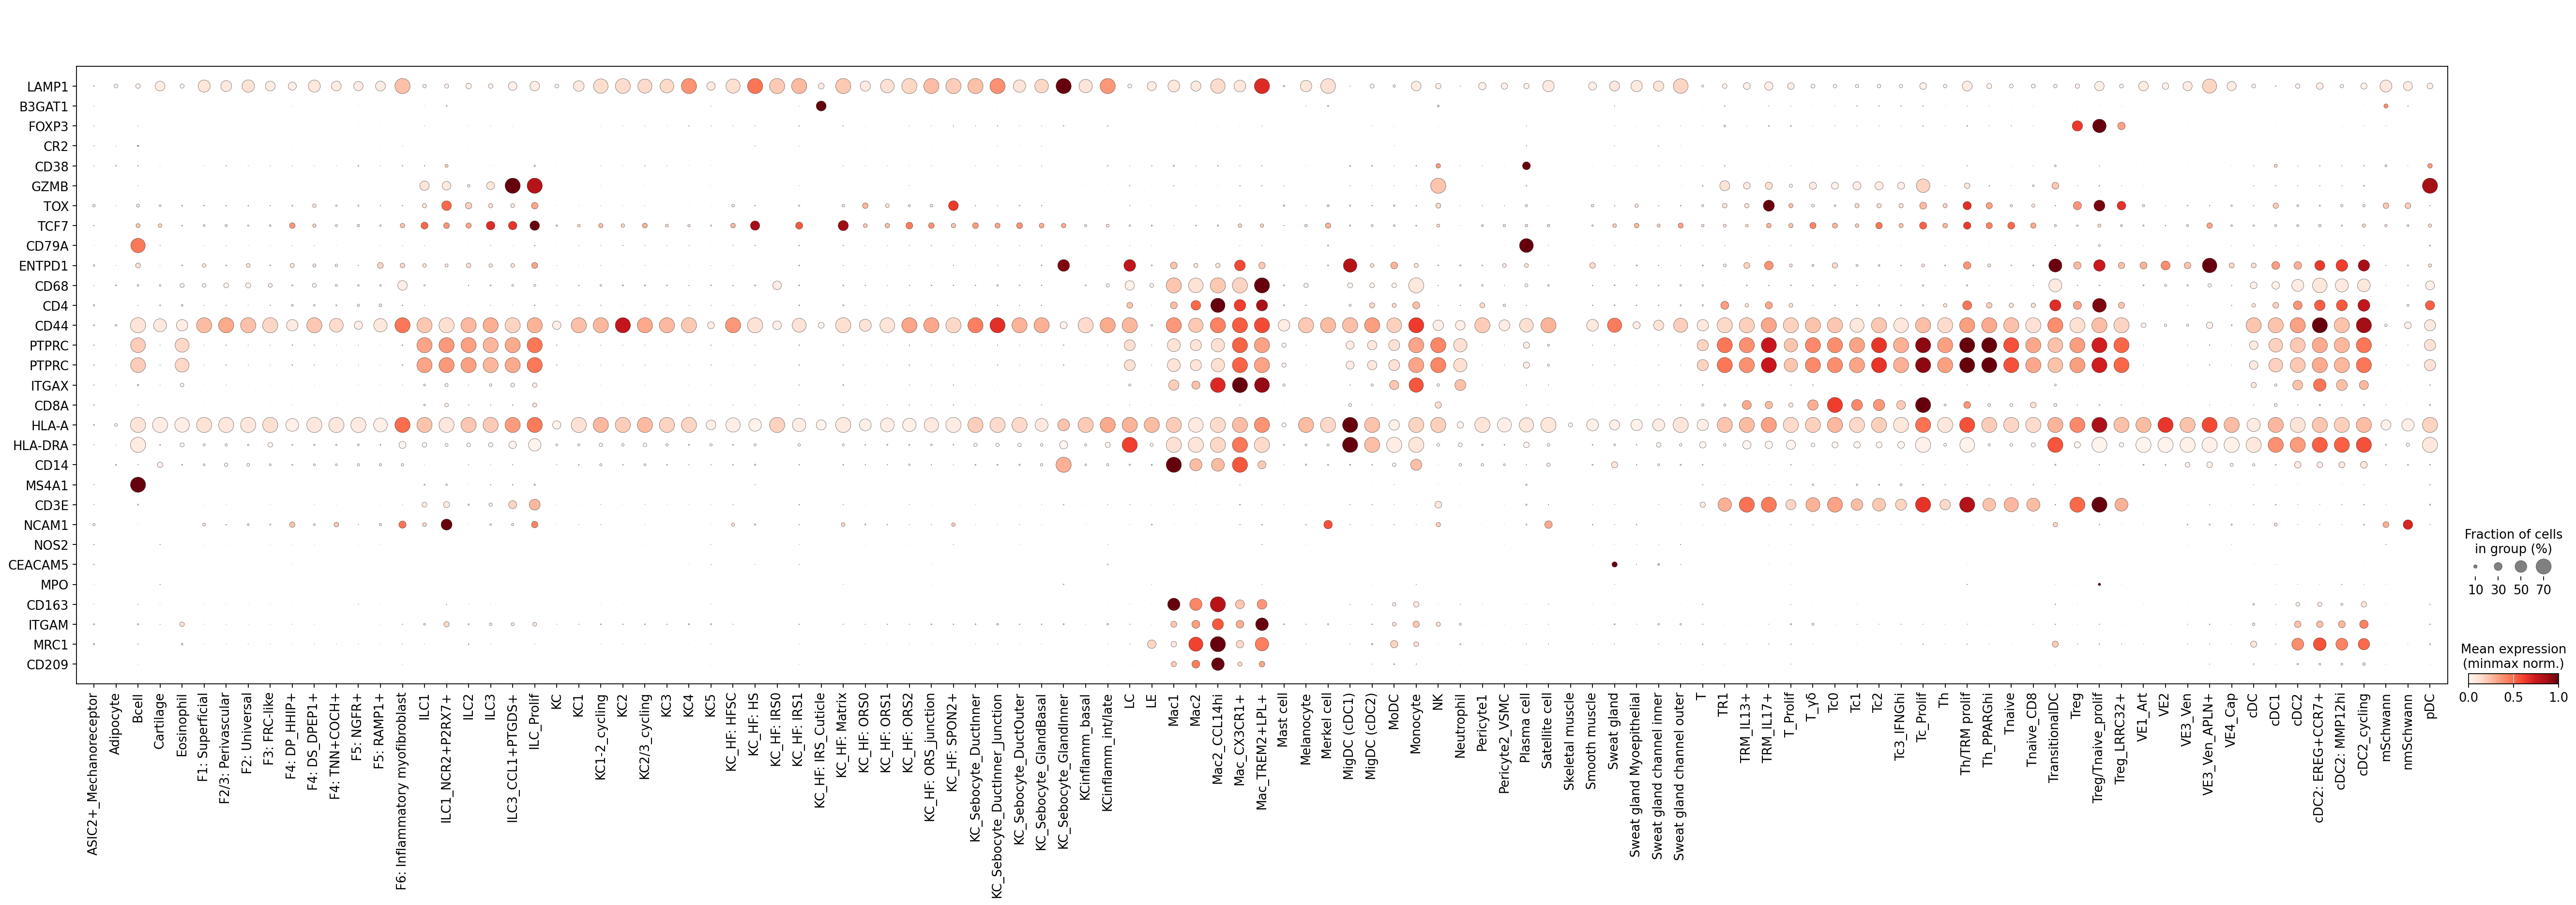

In [8]:
genes = [
    # previous ones
    "LAMP1",     # CD107
    "B3GAT1",    # CD57
    "FOXP3",     # FOXP3
    "CR2",       # CD21
    "CD38",      # CD38
    "GZMB",      # Granzyme B
    "TOX",       # TOX
    "TCF7",      # TCF-1
    "CD79A",     # CD79a
    "ENTPD1",    # CD39

    # new ones
    "CD68",      # CD68
    "CD4",       # CD4
    "CD44",      # CD44
    "PTPRC",     # CD45
    "PTPRC",     # CD45RO (same gene, different isoform)
    "ITGAX",     # CD11c
    "CD8A",      # CD8
    "HLA-A",     # HLA-A
    "HLA-DRA",   # HLA-DR
    "CD14",      # CD14
    "MS4A1",     # CD20
    "CD3E",      # CD3e
    "NCAM1",     # CD56
    "NOS2",      # iNOS
    "CEACAM5",   # CD66
    "MPO",       # MPO
    "CD163",     # CD163
    "ITGAM",     # CD11b
    "MRC1",      # CD206
    "CD209"      # CD209
]

# genes = [
#   #  "H3C1",       # Histone H3 (Phospho S28 is a PTM; H3C1 is a canonical H3 gene)
#     "PCNA",       # Proliferating Cell Nuclear Antigen
#     "MKI67",      # Ki-67
#     "PECAM1",     # CD31
#     "CDH1",       # E-cadherin
#     "ACTA2",      # SMA (alpha-smooth muscle actin)
#     "VIM",        # Vimentin
#     "CD34",       # CD34
#     "ACTB",       # Beta-actin
#     "PDPN",       # Podoplanin
#     "COL4A1",     # Collagen IV (alpha 1 chain)
#     "CAV1",       # Caveolin-1
#     "CTNNB1",     # β-Catenin (gene = CTNNB1)
#     "KRT14",      # Keratin 14
#     "SOX2",       # SOX2
#     "KRT8",       # Keratin 8
#     "KRT18",      # Keratin 18
#     "ESR1",       # Estrogen receptor (ER)
#     "BCL2",       # Bcl-2
#     "EPCAM",      # EpCAM
#     "PMEL",       # GP100 (melanocyte marker)
#     "TP63",       # TP63 (p63)
#     "KRT5"        # Keratin 5
# ]

sc.pl.dotplot(adata, 
             genes,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
              swap_axes=True,
             # save="drug_target.pdf",
              colorbar_title="Mean expression\n(minmax norm.)"
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
              #save="T_scrnaONLY.pdf"
             )


In [ ]:
sc.pl.dotplot(adata, 
             ["CD200", "CD200R1",
             "TNFRSF4",
              "TNFSF4"
             ],
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
              swap_axes=True,
              save="drug_target.pdf",
              colorbar_title="Mean expression\n(minmax norm.)"
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
              #save="T_scrnaONLY.pdf"
             )


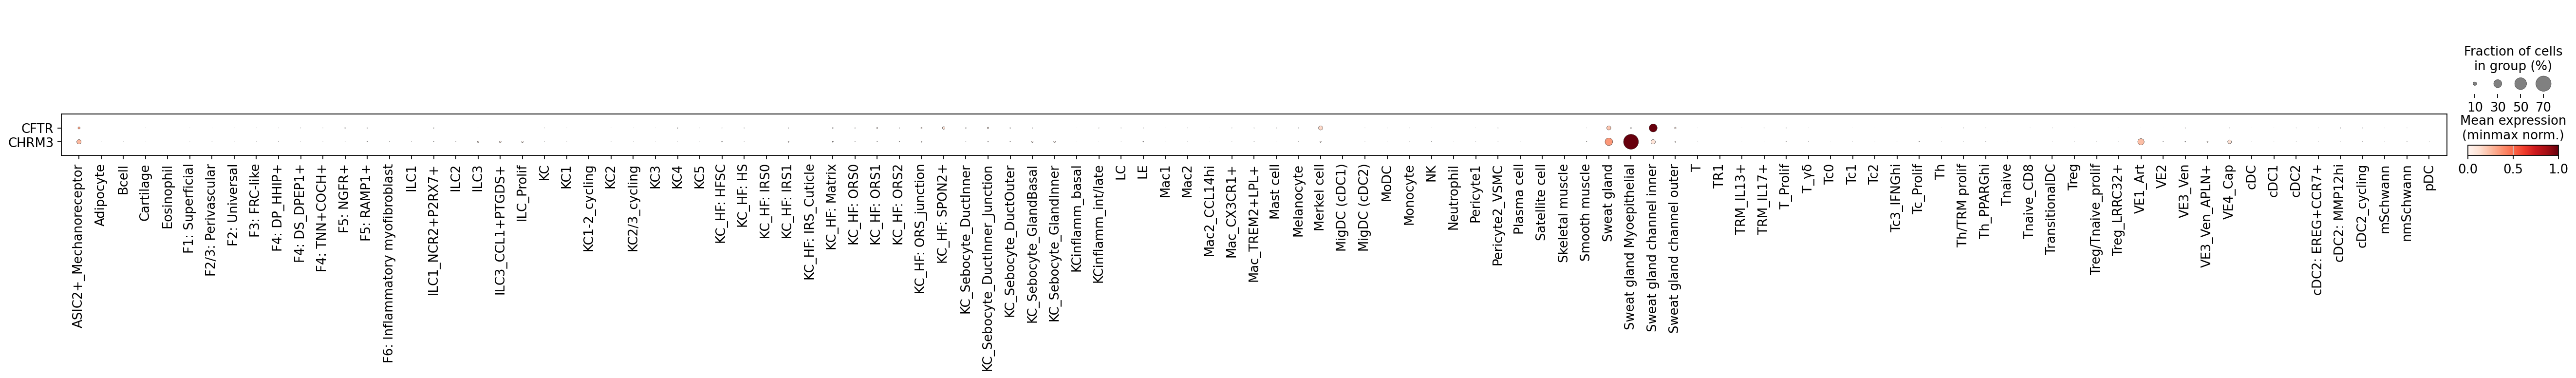

In [17]:
sc.pl.dotplot(adata, 
             ["CFTR", "CHRM3",
           
             ],
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
              swap_axes=True,
              save="investigation_planning.pdf",
                            colorbar_title="Mean expression\n(minmax norm.)"

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
              #save="T_scrnaONLY.pdf"
             )


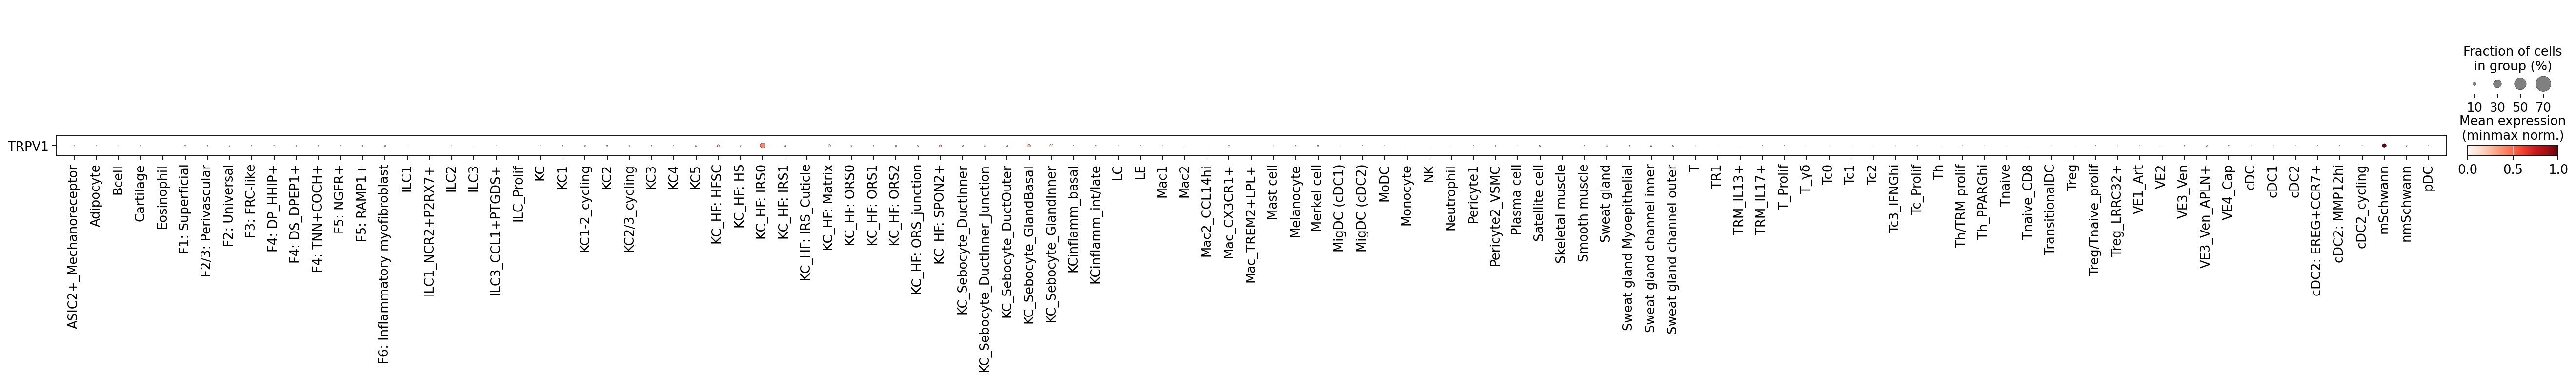

In [19]:
sc.pl.dotplot(adata, 
             ["TRPV1",    ],
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
              swap_axes=True,
              save="TRPV1.pdf",
                            colorbar_title="Mean expression\n(minmax norm.)"
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
              #save="T_scrnaONLY.pdf"
             )


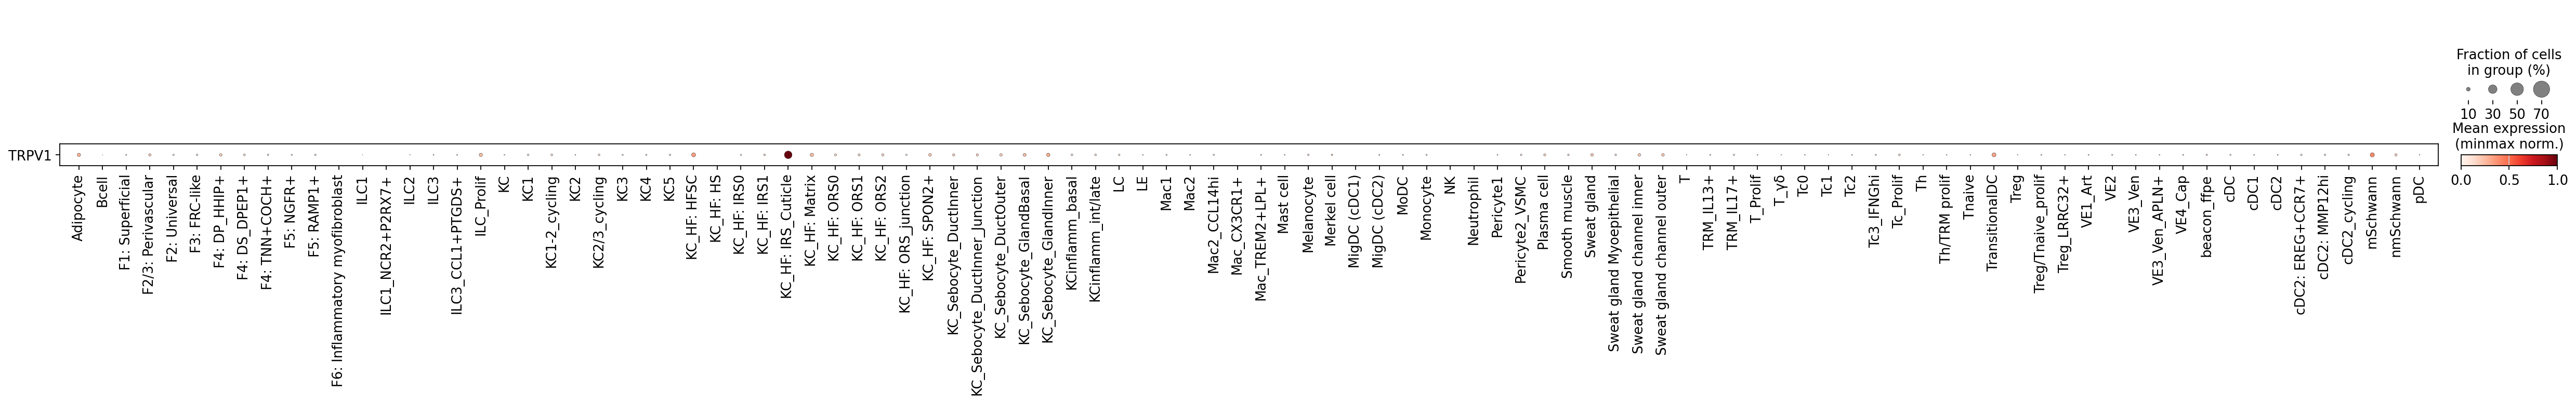

In [21]:
sc.pl.dotplot(adata_5k, 
             ["TRPV1",    ],
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
              swap_axes=True,
              save="TRPV1.pdf",
                            colorbar_title="Mean expression\n(minmax norm.)"
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
              #save="T_scrnaONLY.pdf"
             )


# T cells

In [9]:
adata_i = adata[#(adata.obs["lvl1_new"].str.startswith("T"))
              (adata.obs["lvl5_annotation"].str.startswith("T"))|
    (adata.obs["lvl5_annotation"].str.startswith("ILC"))|
    (adata.obs["lvl5_annotation"].str.startswith("NK"))
               ]
adata_i = adata_i[~(adata_i.obs["lvl5_annotation"].str.startswith("Tran"))]

adata_i.obs[CATEGORY].value_counts()

lvl5_annotation
Th                    42702
Th_PPARGhi            24761
Treg_LRRC32+          20990
Tnaive                15842
Tc2                   14613
TRM_IL13+             14580
Treg                  14392
T                     14242
T_γδ                  11480
Tc3_IFNGhi             8298
Tc1                    8202
ILC3                   6984
Tc0                    6490
ILC1                   5679
NK                     2113
Tnaive_CD8             1741
ILC2                   1184
Th/TRM prolif          1129
TRM_IL17+              1076
TR1                     747
T_Prolif                718
ILC3_CCL1+PTGDS+        697
Treg/Tnaive_prolif      687
ILC_Prolif              278
Tc_Prolif               183
ILC1_NCR2+P2RX7+        114
Name: count, dtype: int64

In [10]:
# adata_5k_i = adata_5k[(adata_5k.obs["lvl1_new"].str.startswith("T"))|
#                       (adata_5k.obs["lvl1_new"].str.startswith("ILC"))
#                     # (adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
#                     #    (adata_5k.obs[CATEGORY].str.startswith("Bcell"))
#                      ]
# adata_5k_i.obs[CATEGORY].value_counts()


In [11]:
desired_order = [ 'Treg',"Treg_LRRC32",'Treg_LRRC32+',
                  'Tr1','TR1','T_lowq maybe',
                'Tnaive','Tnaive_CD8',
                  'Tnaive/Tcm','Tnaive/Tcm,1','Tnaive/Tcm,0','Tnaive (blood)','TRM/Tnaive',
    
                 'T_CD4_naive','Th_MCAMhi_PTGS2+', 
                  'Th','Th_MCAMhi',
                 'Th_CXCR6+',
                 'Th_PPARGhi',
                 'Tc0',
                 'Tc0_IL9R+_GPR15hi',"Tc_IL9R+GPR15hi",'Tc_GPR15hi',
               'Tc_naive','Tc1',
                  'Tc','Tc2','Tc_IFNGhi1',
                  'Tc_IFNGhi','Tc1_IFNGhi', 'Tc_IFNGhi2', 'Tc2_IFNGhi',
                 'Tc3_IFNGhi',
                 
                 
                 'TRM_IL13+',
'TRM_IL17+_Cytotoxic',                 'TRM_IL17+_other',


                  'Tc_IL13','TRM_IL22_2','TRM_IL22','T*RM*_IL22','TRM_IL13',
                  'Tc_IL17','TRM_IL17+mixed','TRM_IL17+','TRM_IL17','TRM_IL17lo','T_ITGA1hi',
'TRM',
 'Tc_gamma_delta','Tc_ZNF683+/γδ', "T_γδ",  'TRM_ZNF683+', 'Tc_ZNF683+','TRM_ZNF683+ITGA1+',
  'T',
 'NK',

 'ILC1_NK','ILC1_NK_cycling',
                 'ILC1','ILC1_NCR2+P2RX7+',



'ILC3',
    'ILC1_3','ILC1_3_cycling',    'ILC1_3_CCL1hi_cycling','ILC3_CCL1+PTGDS+',  'ILC_Prolif',
 
'ILC2',



'T_Prolif',


'Eosinophils', 
'Eosinophil',"missing",
                 "Treg/Tnaive_prolif",
                 'Th/TRM prolif','TRM_Prolif',
'Treg_prolif',

'Tc_Prolif',
               
                 










                 


 ]


ORDER_T=desired_order


# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        

# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)


/tmp/ipykernel_2492441/1141661065.py:73: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/1141661065.py:86: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs[CATEGORY] = pd.Categorical(


In [12]:
# ALL_T = {'Conventional': ['CD3D', ],
#               'Treg': ['FOXP3', 'TIGIT',  "IL2RA"],
#          "Activated_Treg": ["LRRC32", "IL1R1","IL1R2", "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A", 
#                             #"NRP1"

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#               'CTLA4',],
#  'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', "PAK2"],
#  'Th': [ "CD4", 'CD40LG', "MCAM", "CCR6", "BACH2"],
#                   "Cytotoxic": [ "NKG7","CCL5","GZMA",  ],

#  'CD8A+ cytotoxic T cells': ['CD8A', 'GZMK', 'IFNG', 'TNFSF9',#"GZMH", "CXCR3", 
#                              "CCL4", "CCL3", #"CCL3L1"# "MCOLN1"
#                             ],
#          "Tissue-residency\n markers": ["ITGAE",  "CD109", 'ZNF683', "ENTPD1", # "RBPJ"
#                                         "ITGAV"
#                                        ],
# 'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
#         # "NBAS", 
#          'CCL1', #"CCL17", 
#          "AREG", "CCR8", "IL9R", #"CCR4", "CCR10"
#         ],
#  'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R",
#          "CCR6","RORC", 'TNFRSF8', "ADAM12", #"IL1R1", #"IL12RB2",
#             'LRRN3',         'MYO7A',  "VDR", #"CD38",
       
#          ],
#          "Other": [    "PTPN13","ITGA1"],
#          # "ITGA1hi": ["ITGA1", 
#          #             'ZHX2',# 'TRPS1', 'TBC1D22A', 'ABLIM1', 
#          #             'BICD1',#'MVB12B', 
#          #             'PRR5L', # 'PCNX4', 'EPHA4', 
#          #             'ST8SIA1', 
#          #             'ZNF407',],
#          #"Memory": ["CD69",],
#               'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
#                              "NSG1", #"LINC02446","CD9", 
#                               "MPZL2", "KLRC2"], #'TRGC2', 
#              "Innate": [ "KLRC2", 'KLRC3', 
#                         "KLRB1", "KIT", "KLRC1","TYROBP", "FCER1G",],
               
#                "NK": [ "TBX21",#
#                       "NCR1",#'NMUR1', "NMU",
#                       "B3GAT1", 
#                       "PTGDS",
#                       "CX3CR1", # 
#                       "CCL4L2", #
#                     #
#                       "PRSS23", "CD160", #
#                       "KLRF1", "KLRG1","S100B",
                             
#                       #"CD160", "PLEK", "NMUR1", "IL12RB1", "FGFBP2", "FCGR3A", "GZMH","AKR1C3","FGR", "CD38", 
#                      # "LAIR2", "SPON2", "S1PR5","FCRL6","PRF1", 
#                               ],
#                       "NK+ILC1": ["KLRD1","NCAM1", "PRF1", "CEBPD"  #"IL15",
#                                  ],
#    'ILC1_NK': [ "IRF8",# 'GZMK', "IGFBP4",  "TCF7"
#                #"IL18", 
#                "ADGRG3", #"CXCR3",
#                "P2RX7"
#               ],
#                "ILC1/3": [ "XCL1", "XCL2", "CSF2", "KRT86" , "CCL17"],

#                "ILC3": ["ID3", #"ZNF683",
#                         "ZBTB46", "TNFSF4", "SPINK2", "RAMP1", "MB", "KLRF2", "TMPRSS11E", #"CAMK1", "PECAM1"
#                        ], #'TNF', "CCR8", "CD9"],

#                 "ILC2+3": ["IL9R", "TNFSF11"],
#  'ILC2': ['GATA3',  "PTGDR2", "TNFRSF25",# "BCL11B", "MAF", 
#           #"CALCRL", "HPGDS" ,  "S1PR1",
#          ],
#       'ILC2_inflammatory': [ "CRLF2", "IL17RB", "IL1RL1" , #"IL4", "IL13",'TNFRSF9',
#                             "IL18R1", "PPARG",
#                             "PTGS2", #"NBAS",# "PDLIM5", "MCAM", 
#                             "PLA2G4A", "IL4", "IL31",
#                            "ICOS", "NRROS"
#                            ],
#          "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
#                                 #  "MYBL2", "TPX2"
#                                   ], 
        
#                }
 

In [13]:
ALL_T = {'Conventional': ['CD3D', "CD4", "CD8A"],
 'Treg': ['FOXP3', 'TIGIT', 'CTLA4', 'IL2RA'],
 'Activated_Treg': ['LRRC32',
  'IL1R1',
  'IL1R2',
 # 'CMSS1',
  'LAYN',
  'CCR8',
  'NR4A1'],
 'TR1': ['EOMES',
  'IL10',
  'LAG3',
  'HAVCR2',
  'PDCD1',
  'FOXB1',
  'TNFSF9',
 # 'VCAM1'
        ],
  
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ICAM2', 'PASK', ],
 'GIMAPs': ['GIMAP1', 'GIMAP4', 'GIMAP5', 'GIMAP7'],
 'Th': ['CD4', 'CD40LG', 'MCAM', ],
 'Th_PPARGhi': ['PPARG', 'BTD', 'KIF13B', 'DGKH', 'RORA-AS1','SPAG1',
         'XYLT1', 'GNAQ',  'ZEB2', # 'PTGS2', 'MMP7',
        "ZHX2",'CCR6', 'BACH2', "CXCR6",
               ],
         #"CD8": ["CD8A"],
        
                
 'CD8A+ cytotoxic T cells': [ 'GZMA', 'GZMK', 'CCL4','NKG7', 'CCL5',  ],
           'Tc0': ['DONSON', 'GPR15', 'CD8B2', 'IL9R', 
                     #"AGAP1", "C12orf42", "GML", "CCR5",
                     ],

         'IFNG': ["KLRG1",'IFNG', 'TNFSF9', 'CCL3'],
 'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
 'T_2': ['IL22', 'IL13', 'NBAS',# 'CCL17',
         'AREG', 'IL9R', 'PDLIM4', 'CCR8'],
 'TRM_IL13': ['ZBTB16', 'KLRC4', 'ADGRG1', 'RGS9'],
 'T_17': ['IL17A',
  'IL17F',
  'CXCL13',
  'CCL20',
  'IL23R',
  'RORC',
  'ADAM12',  'LRRN3',
  'MYO7A',
  'IL21',],
    'Mixed': [

  'CTSH',
  'VDR',
  'CCR6',
  'IL26'
         ],
 'Other': ['PTPN13', #'ITGA1'
          ],
 'ITGA1hi': ['ITGA1', 'ZHX2', 'BICD1', 'PRR5L', 'ST8SIA1', 'ZNF407', "KLRG1"],
 'Gamma-delta': ['FXYD2',
  'TRGC2',
  'TRDV1',
  'TRGV4',
  'EMP1',
  'NSG1',
  'MPZL2',
  'XCL1',
  'KLRC2',
  'KLRC3',
  'KLRD1',
  'TRDC',
  'VSTM2L',
  'LAT2',
  'SPINT2',
  'KRT86',
  'FCER1G',
  'TRDV1',
  'SPRY2'],
 'Innate': [#'KLRC2', 'KLRC3', 'KLRB1', 'KIT', 'KLRC1',
     'TYROBP',],
 #'ILC2': ['GATA3', 'PTGDR2', 'TNFRSF25'],
                 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
 # 'ILC2_inflammatory': ['CRLF2',
 #  'IL17RB',
 #  'IL1RL1',
 #  'IL18R1',
 #  'PLA2G4A',
 #  'IL4',
 #  'IL31',
 #  'ICOS',
 #  'NRROS'],

        }
 
 

# T cells only

In [14]:
adata_ii = adata_i[~(adata_i.obs[CATEGORY].str.startswith("ILC"))]
adata_ii = adata_ii[~(adata_ii.obs[CATEGORY].str.startswith("NK"))]
adata_ii.obs[CATEGORY].value_counts()

lvl5_annotation
Th                    42702
Th_PPARGhi            24761
Treg_LRRC32+          20990
Tnaive                15842
Tc2                   14613
TRM_IL13+             14580
Treg                  14392
T                     14242
T_γδ                  11480
Tc3_IFNGhi             8298
Tc1                    8202
Tc0                    6490
Tnaive_CD8             1741
Th/TRM prolif          1129
TRM_IL17+              1076
TR1                     747
T_Prolif                718
Treg/Tnaive_prolif      687
Tc_Prolif               183
Name: count, dtype: int64

In [15]:
# adata_5k_ii = adata_5k_i[~(adata_5k_i.obs[CATEGORY].str.startswith("ILC"))]
# adata_5k_ii = adata_5k_ii[~(adata_5k_ii.obs[CATEGORY].str.startswith("NK"))]
# adata_5k_ii.obs[CATEGORY].value_counts()

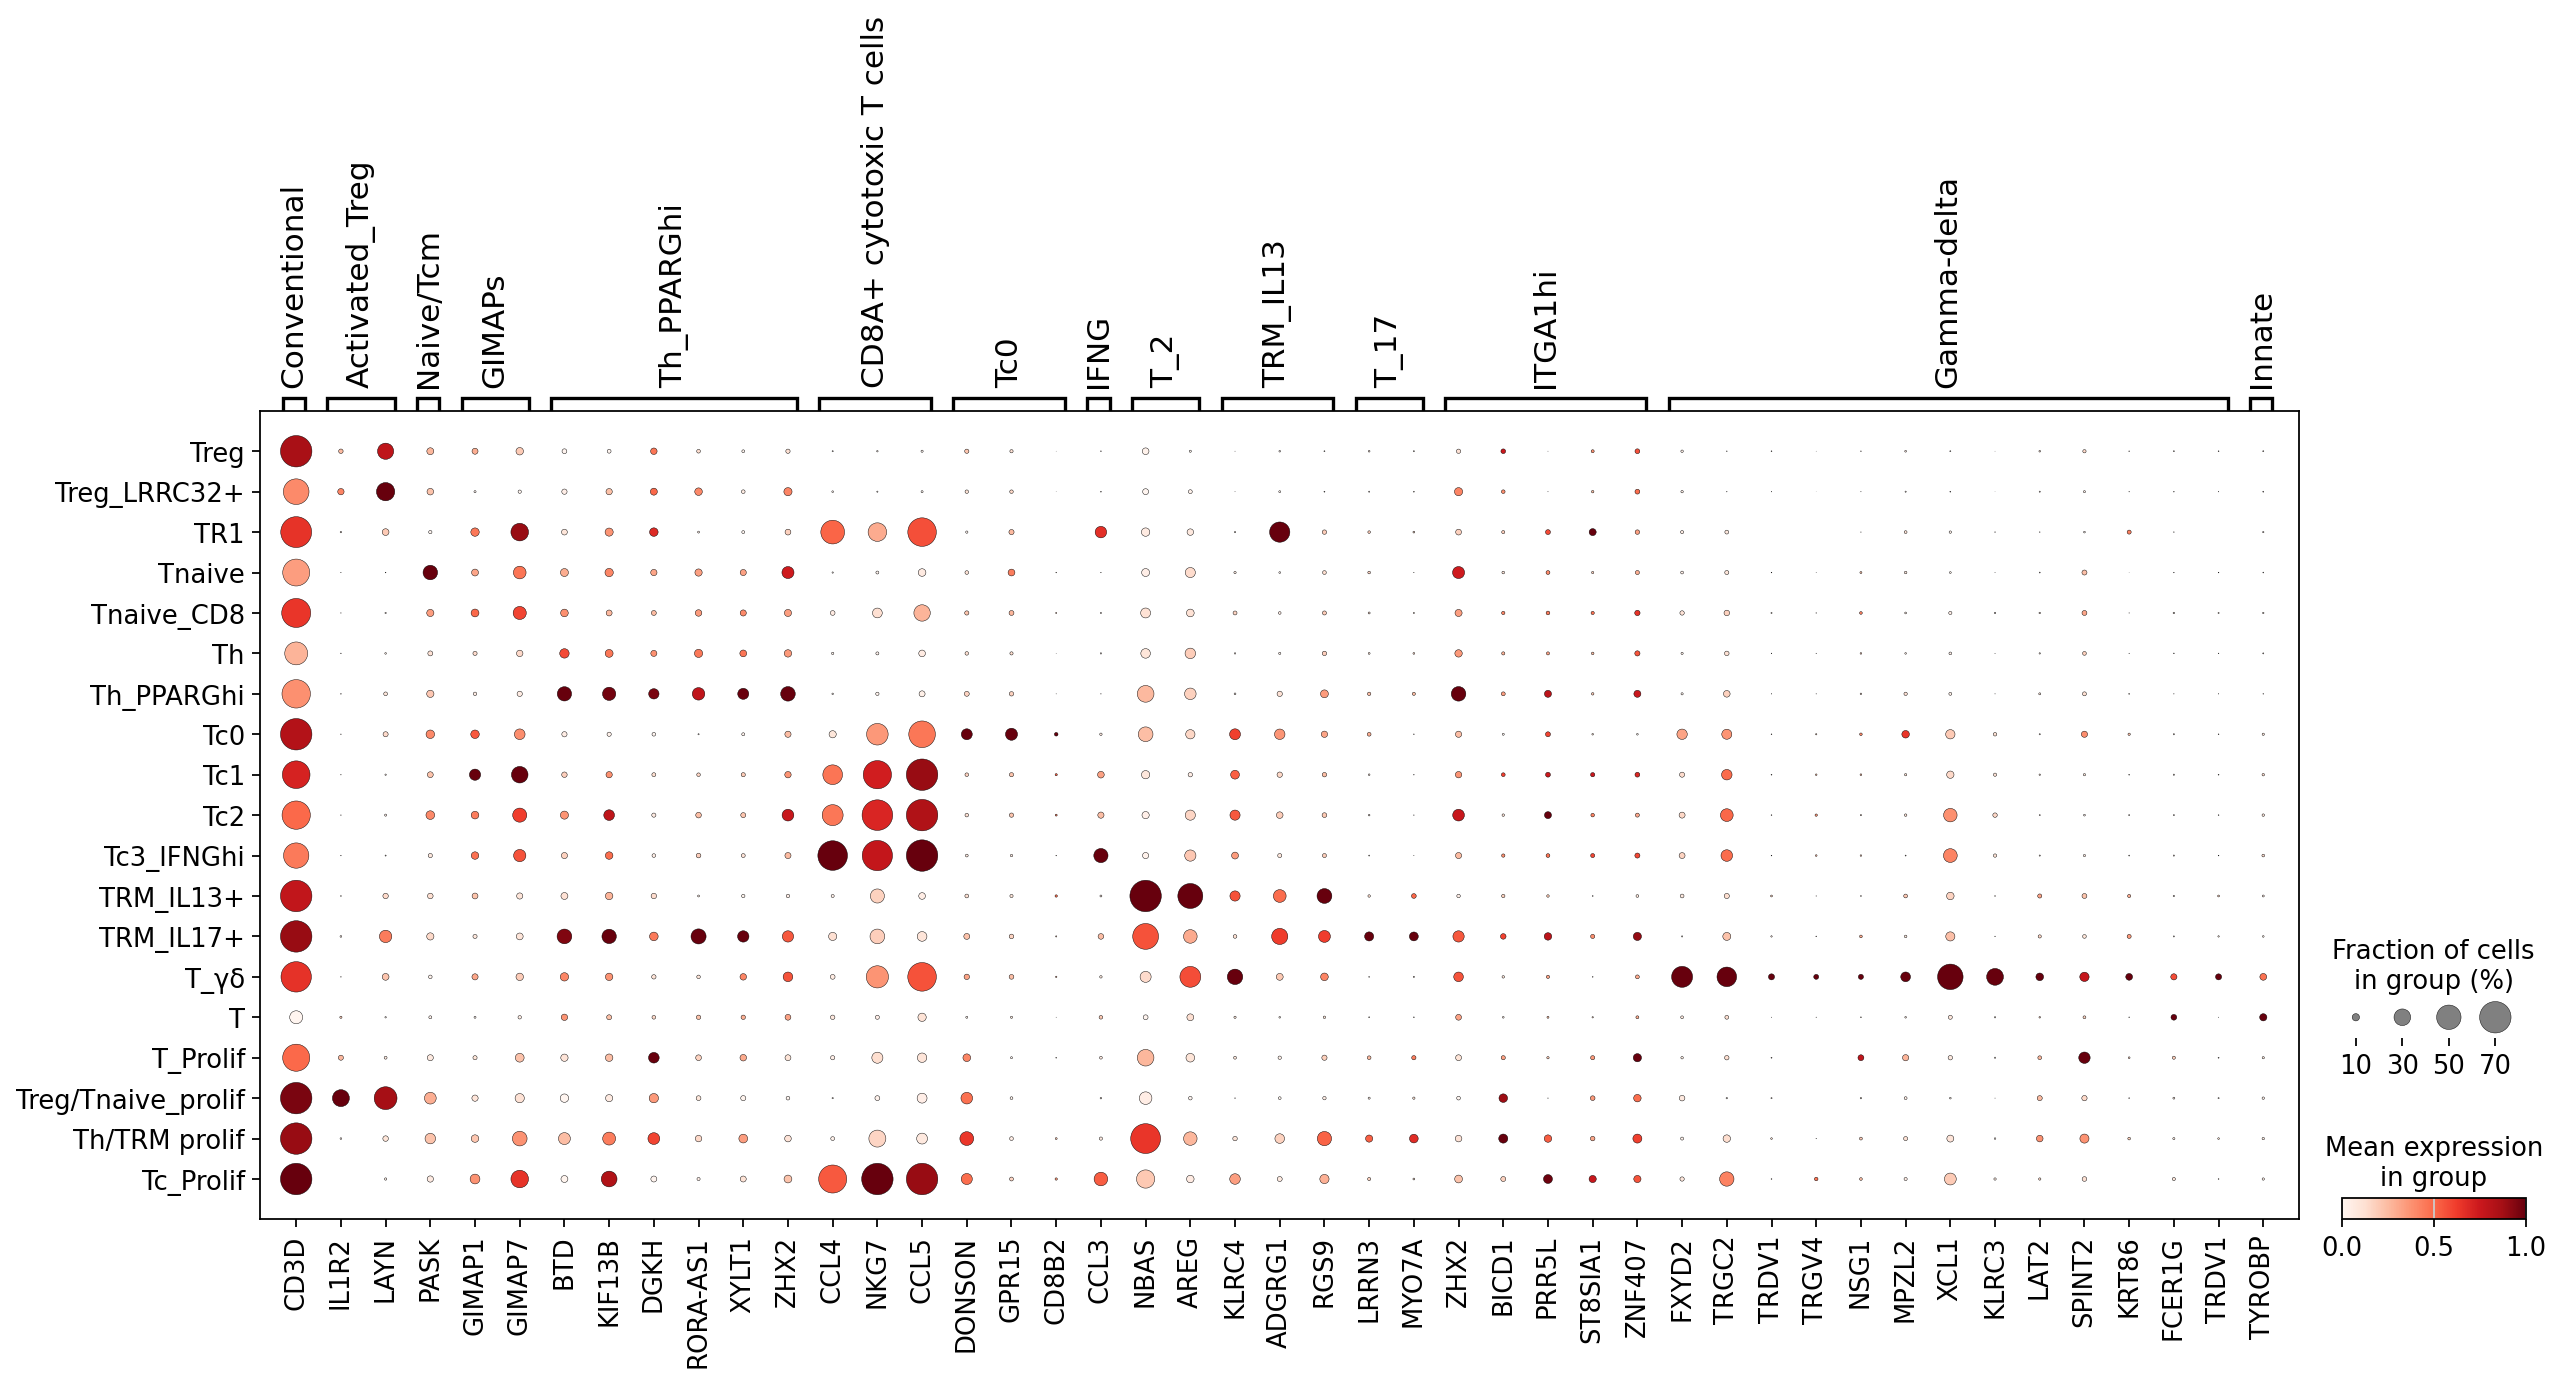

In [16]:
dict2 = remove_markers(ALL_T)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in ALL_T.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}


sc.pl.dotplot(adata_ii, 
             SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
              dot_max=.7,
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()],
              save="T_scrnaONLY.pdf"
             )



# ilc only

In [17]:
adata_ii = adata_i[(adata_i.obs[CATEGORY].str.startswith("ILC"))|
                   (adata_i.obs[CATEGORY].str.startswith("NK"))]
adata_ii.obs[CATEGORY].value_counts()

lvl5_annotation
ILC3                6984
ILC1                5679
NK                  2113
ILC2                1184
ILC3_CCL1+PTGDS+     697
ILC_Prolif           278
ILC1_NCR2+P2RX7+     114
Name: count, dtype: int64

In [18]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G', ],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", "APOBEC3D", "GZMA", 'GZMK', 'OASL',  "CXCR3", 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  ['NCR1','NCAM1','P2RX7','ZNF407','IL18','ZBTB20','CASK','ITGA1',
 'PLCB1','ADAM28','CNR2'],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1', 'IL1RN', 'PTGS1', 'PTP4A1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],

        }
 

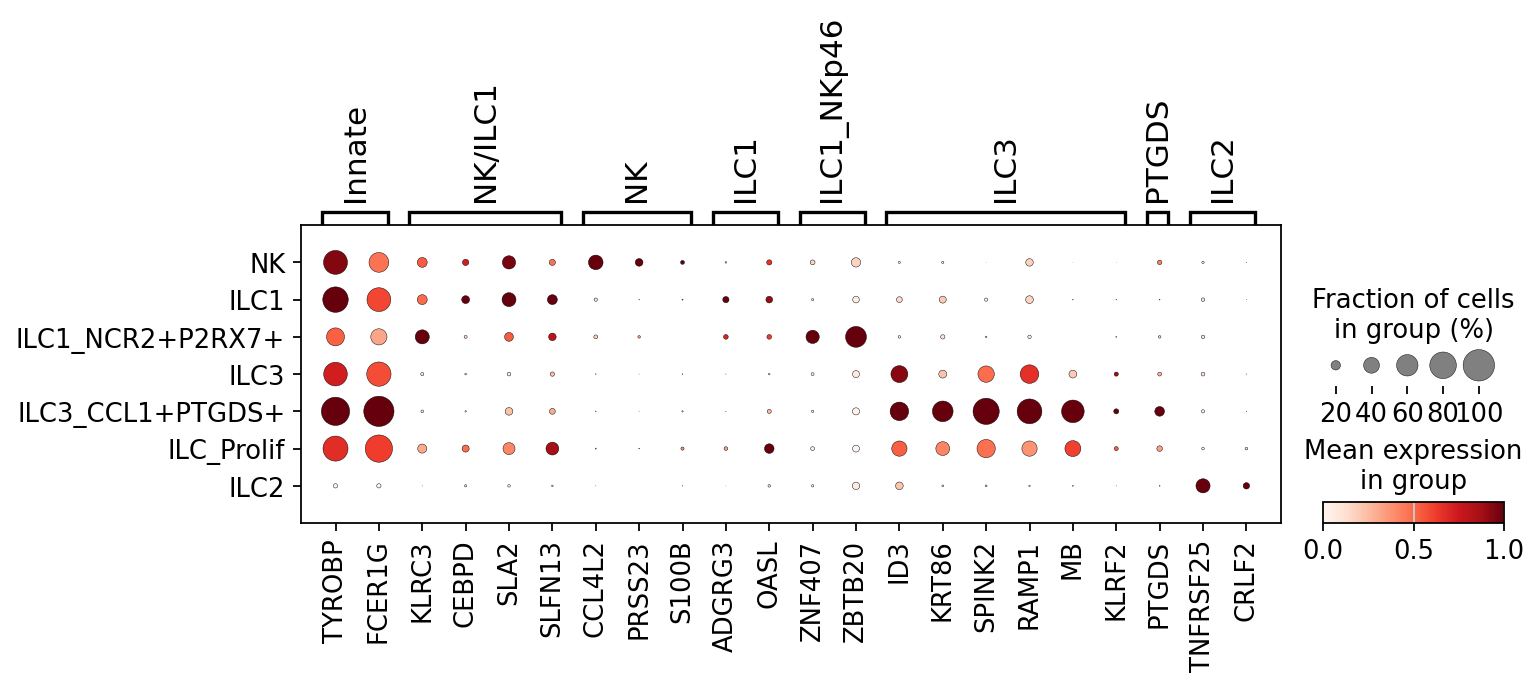

In [19]:
dict2 = remove_markers(ALLT2)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in ALLT2.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}


sc.pl.dotplot(adata_ii, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                           save="ILC_scrnaONLY.pdf"

 

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )
 

# other

In [20]:
adata_i = adata[(adata.obs["lvl1_new"]=="Other")|
               (adata.obs[CATEGORY]=="Bcell")|
                   (adata.obs[CATEGORY]=="Plasma cell")|
                               (adata.obs["lvl1_new"]=="Schwann")
                
               ]
adata_i=adata_i[adata_i.obs[CATEGORY]!="Mast cell"]
adata_i.shape

(48118, 32732)

In [21]:
import pandas as pd
desired_order = [ 'Melanocyte', 'mSchwann',  'nmSchwann', 
                 'Merkel cell',"Mechanoreceptor_ASIC2+", "Mechanoreceptor ASIC2+","ASIC2+_Mechanoreceptor",

                 'Cartilage',  'Adipocyte', #'Mast cell',
               'Bcell', "Plasma cell2", 'Plasma cell', 
                # 'Neutrophil'
                 'Melanocyte doublet3',
'nmSchwann*',
'Erythroid',
'Merkel partly?',
'Melanocyte_T doublet2',
'Melanocyte doublet1',
'Satellite muscle', 'Satellite cell', "missing"
                ]


# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        

# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)



/tmp/ipykernel_2492441/3822947581.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/3822947581.py:22: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/3822947581.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs[CATEGORY] = pd.Categorical(


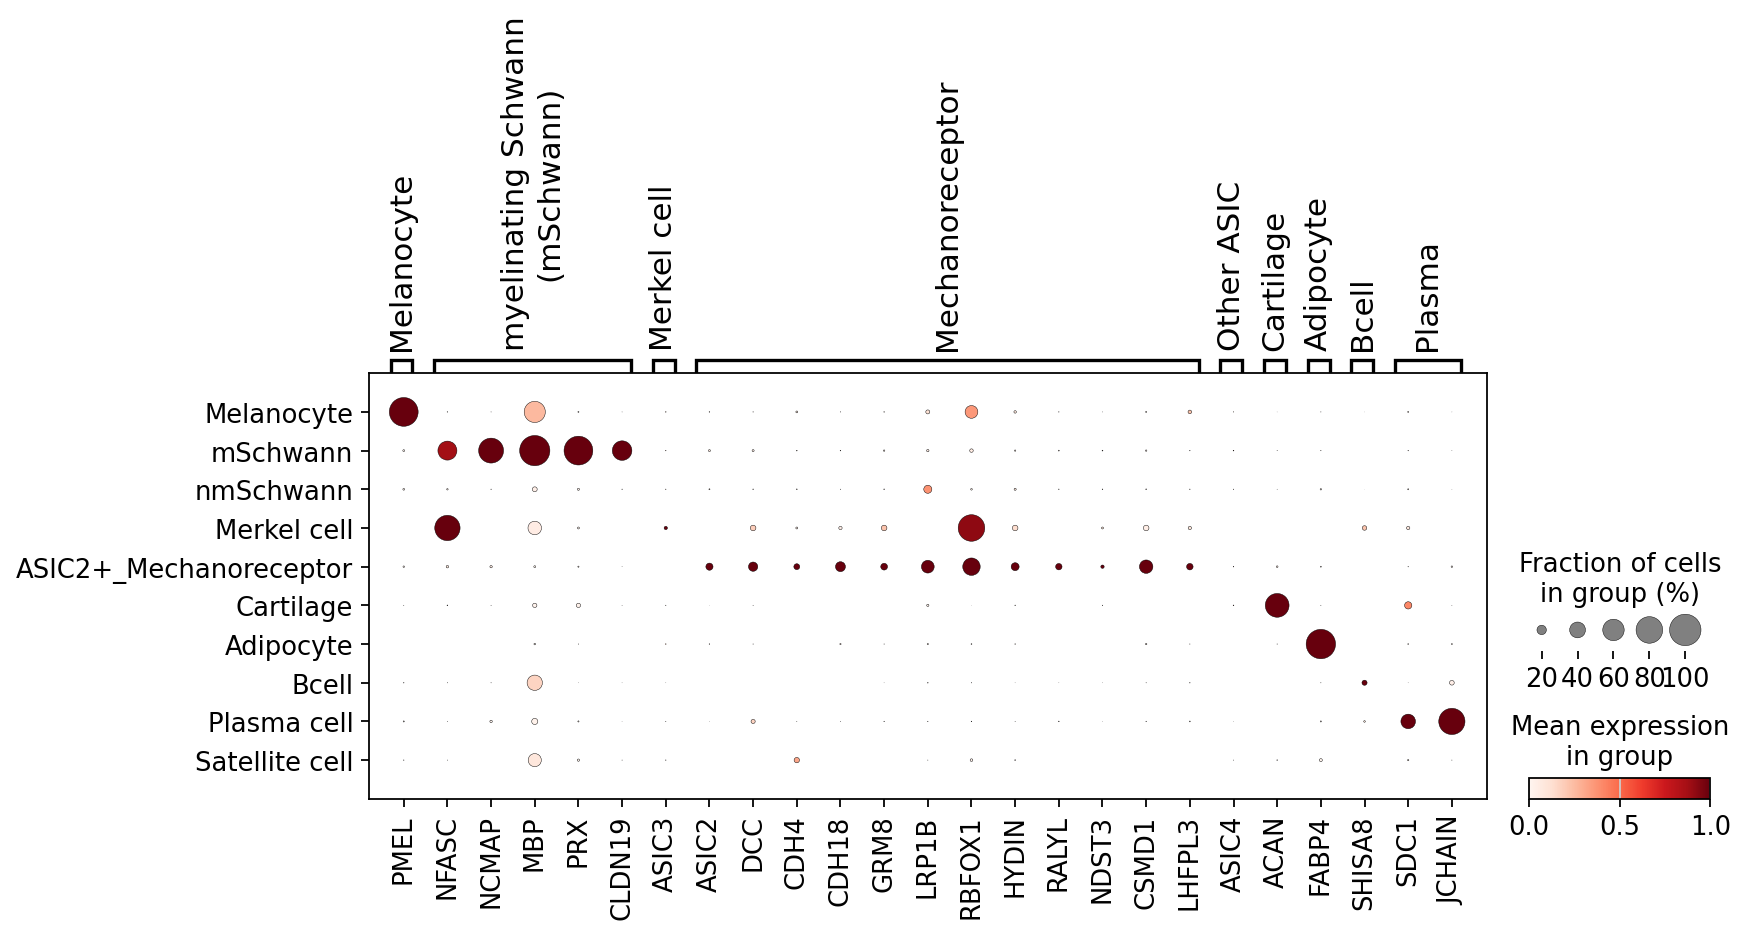

In [22]:
MISC_IMMUNE_SHORT = {#"LRRC32_genes": ["SIRT6", "GRWD1", "CWC25", "LRRC32", "ARMCX1", "MRPL50", "PID1", "ZNF593", "NR1D1",
               #                "CCRL2" , "FOSL1", "ACHE", "SYNGAP1", "PHLDB1" , "IRF2"],
               #"TREM2_MAC": ["AXL", "C3", "FCGR3A", "TNFSF13", "IGSF21", "TREM2", "CD276", "SOCS6", "MERTK", "TNFSF12", "SLC12A5", "HTRA1", "IFITM10"],
               
        #"BCELL+PLASMA+PDC": ["IGKC",  "MZB1","ST6GALNAC4", "GAB1",],
        "Melanocyte": ["DCT", "MLANA", "PMEL", "SOX2",],
    "Schwann": ["MPZ",],
           "myelinating Schwann\n(mSchwann)": ['NFASC', 'NCMAP', 'MBP', 'PRX', "SFRP5","EGR2",
                                            "CLDN19", "GPR37L1"],
           
           "nonmyelinating Schwann\n(nmSchwann)": ['NGFR', 'SCN7A',   "PCDH20", 
                                                        'L1CAM', 'NCAM1'],

    
            "Merkel cell": ["ATOH1", "KRT20", "POU4F3", "TRPM2", "PIEZO2", "ASIC3", 
                           "CCK", "NEBL", "SYP", "MIAT", "ACHE","TRPM2",
                           ],
    "Mechanoreceptor": ["ASIC2","CA10", "DCC", "CDH4", "CDH18","GRM8",
                        "LRP1B", #"IL1RAPL1","CTNNA2", "SUGCT", "NRXN1", "OPCML", 
               "RBFOX1", #"DOK6", 
               "HYDIN", #"RYR3",
               "RALYL", "GRM7", "NDST3",  'CSMD1','LHFPL3',
'IQGAP2', 'CD96', 'DNAH14', 'IGF2BP3', 'CPEB3', 'TBXAS1', 'PHEX', 'ABCB1', 'DPYD',                        
               #"HULC", "RYR3", "DMD", "ROBO2", "TENM2", "NRG3", "PCAT1", "CACNA2D3", 
               #"DLC1", "NAV3"
              
                       ],
    "Other ASIC": ["ASIC1", "ASIC4"],
    
    "Cartilage": ["ACAN", "COL2A1", "FOXC2", "CHAD"],
        "Adipocyte": ["ADIPOQ",  "FABP4", "PLIN1", "CIDEC"],

    "Plasma+Bcell": ["CD79A", "TNFRSF13C", "POU2AF1"  ],
                    "Bcell": ["CD19", "MS4A1", # CD20 = MS4A1
                              "CXCR5", "SHISA8", "FCRL1", "HHEX","CCR6",
                              
                              'CD80', 
                              
                              
                        # "CD80", "CD86", "HLA-DRA", "HLA-DRB1" 
                              ],
#       "B2": [
#      #"CXCL12",
#     #"LILRB4",
#     #"SLIT3",
#     "SELL",
#     #"TNFSF13B",
#    # "TNFSF10",
#     "PRKCB",
#     "IRF8", "IRF4",
#              "GZMB",   "SVIL",
#     "IL3RA",
#            "CD86", "TLR9" 
# ] ,

        "Plasma": ["SDC1", "JCHAIN","MZB1","DERL3", #"SPAG4", 
                   "CD38", ],
  
           #    "PDC": [ "MAP1A", "PTCRA" , "IL3RA", "P2RY6", "PTCRA",  "LILRA4", "RHEX", "SCT"],
             'Satellite muscle': ['FGFR4',
  'SERPINA3',
  'MEST',
 # 'H19',
  'PAX7',
  'DLK1',
  'SIX1',
  'PITX2'],


}


adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()

dict2 = remove_markers(MISC_IMMUNE_SHORT)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in MISC_IMMUNE_SHORT.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}


sc.pl.dotplot(adata_i, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                           save="misc_scrnaONLY.pdf"

 

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )
 

# myeloid

In [23]:
adata_i = adata[(adata.obs["lvl1_new"]=="Myeloid")|
                (adata.obs[CATEGORY]=="Mast cell")|
                                (adata.obs[CATEGORY]=="Neutrophil")

               ]
       
adata_i.shape
 


desired_order = [ 'Mono','Monocyte', 'Mono CD16+','Monocyte1','Monocyte2','Monocyte blood (cd16+)',
                      'Mac1',

                 
     'Mac2',         'Mac2_A','Mac2_b', "Mac2_CCL14hi",
                 'Mac2_CCL14highest',
                 
                 
                 
       








                'Mac_TREM2+LPL+',

                  'MacTREM2_CX3CR1+','Mac_TREM2+CX3CR1+',"Mac_CX3CR1+",
                 'Transitional DC','TransitionalDC',"TransitionalDC_CARD9+",
 "AXL+SIGLEC6+ DC",'cDC',
    'cDC1','cDC2','cDC2/Mac (Nondescript)',
 'cDC2: IL1B+',
 'cDC2: MMP12+', 'cDC2: MMP12hi','cDC2: MMP12+IL1B',"cDC2: EREG+CCR7+", "cDC2_cycling",


                'cDC2: MMP12hiIL1B+',


                 'MoDC',       'MoDC_OUTLIER1','MoDC_OUTLIER2','Mo_DC1','MoDC*',
                  'LC',"LC_SLC18A2+","LC_CCR7+",'LC2','LC*',
 'MigDC','MigDC (cDC1/stress)','MigDC (cDC1)','MigDC (cDC2)','MigDC_T_doublet?','MigDC2_T_doub',

 'pDC',"pDC_LAMP5+",
"pDC_IGKJ5+",
"pDC_CXCL2+CXCL3+",
     "Neutrophil","Mast cell",'Mast cell/doublet', 'Mac_T_doublet',
                 'Eosinophil','MoDC/MigDC/Mac stress','Mast cell_Tdoublet',
                 "Plasma cell", "missing","ASIC2+_Mechanoreceptor"
                 
          
 









]

# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
 

/tmp/ipykernel_2492441/428531296.py:67: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/428531296.py:71: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/428531296.py:84: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs[CATEGORY] = pd.Categorical(


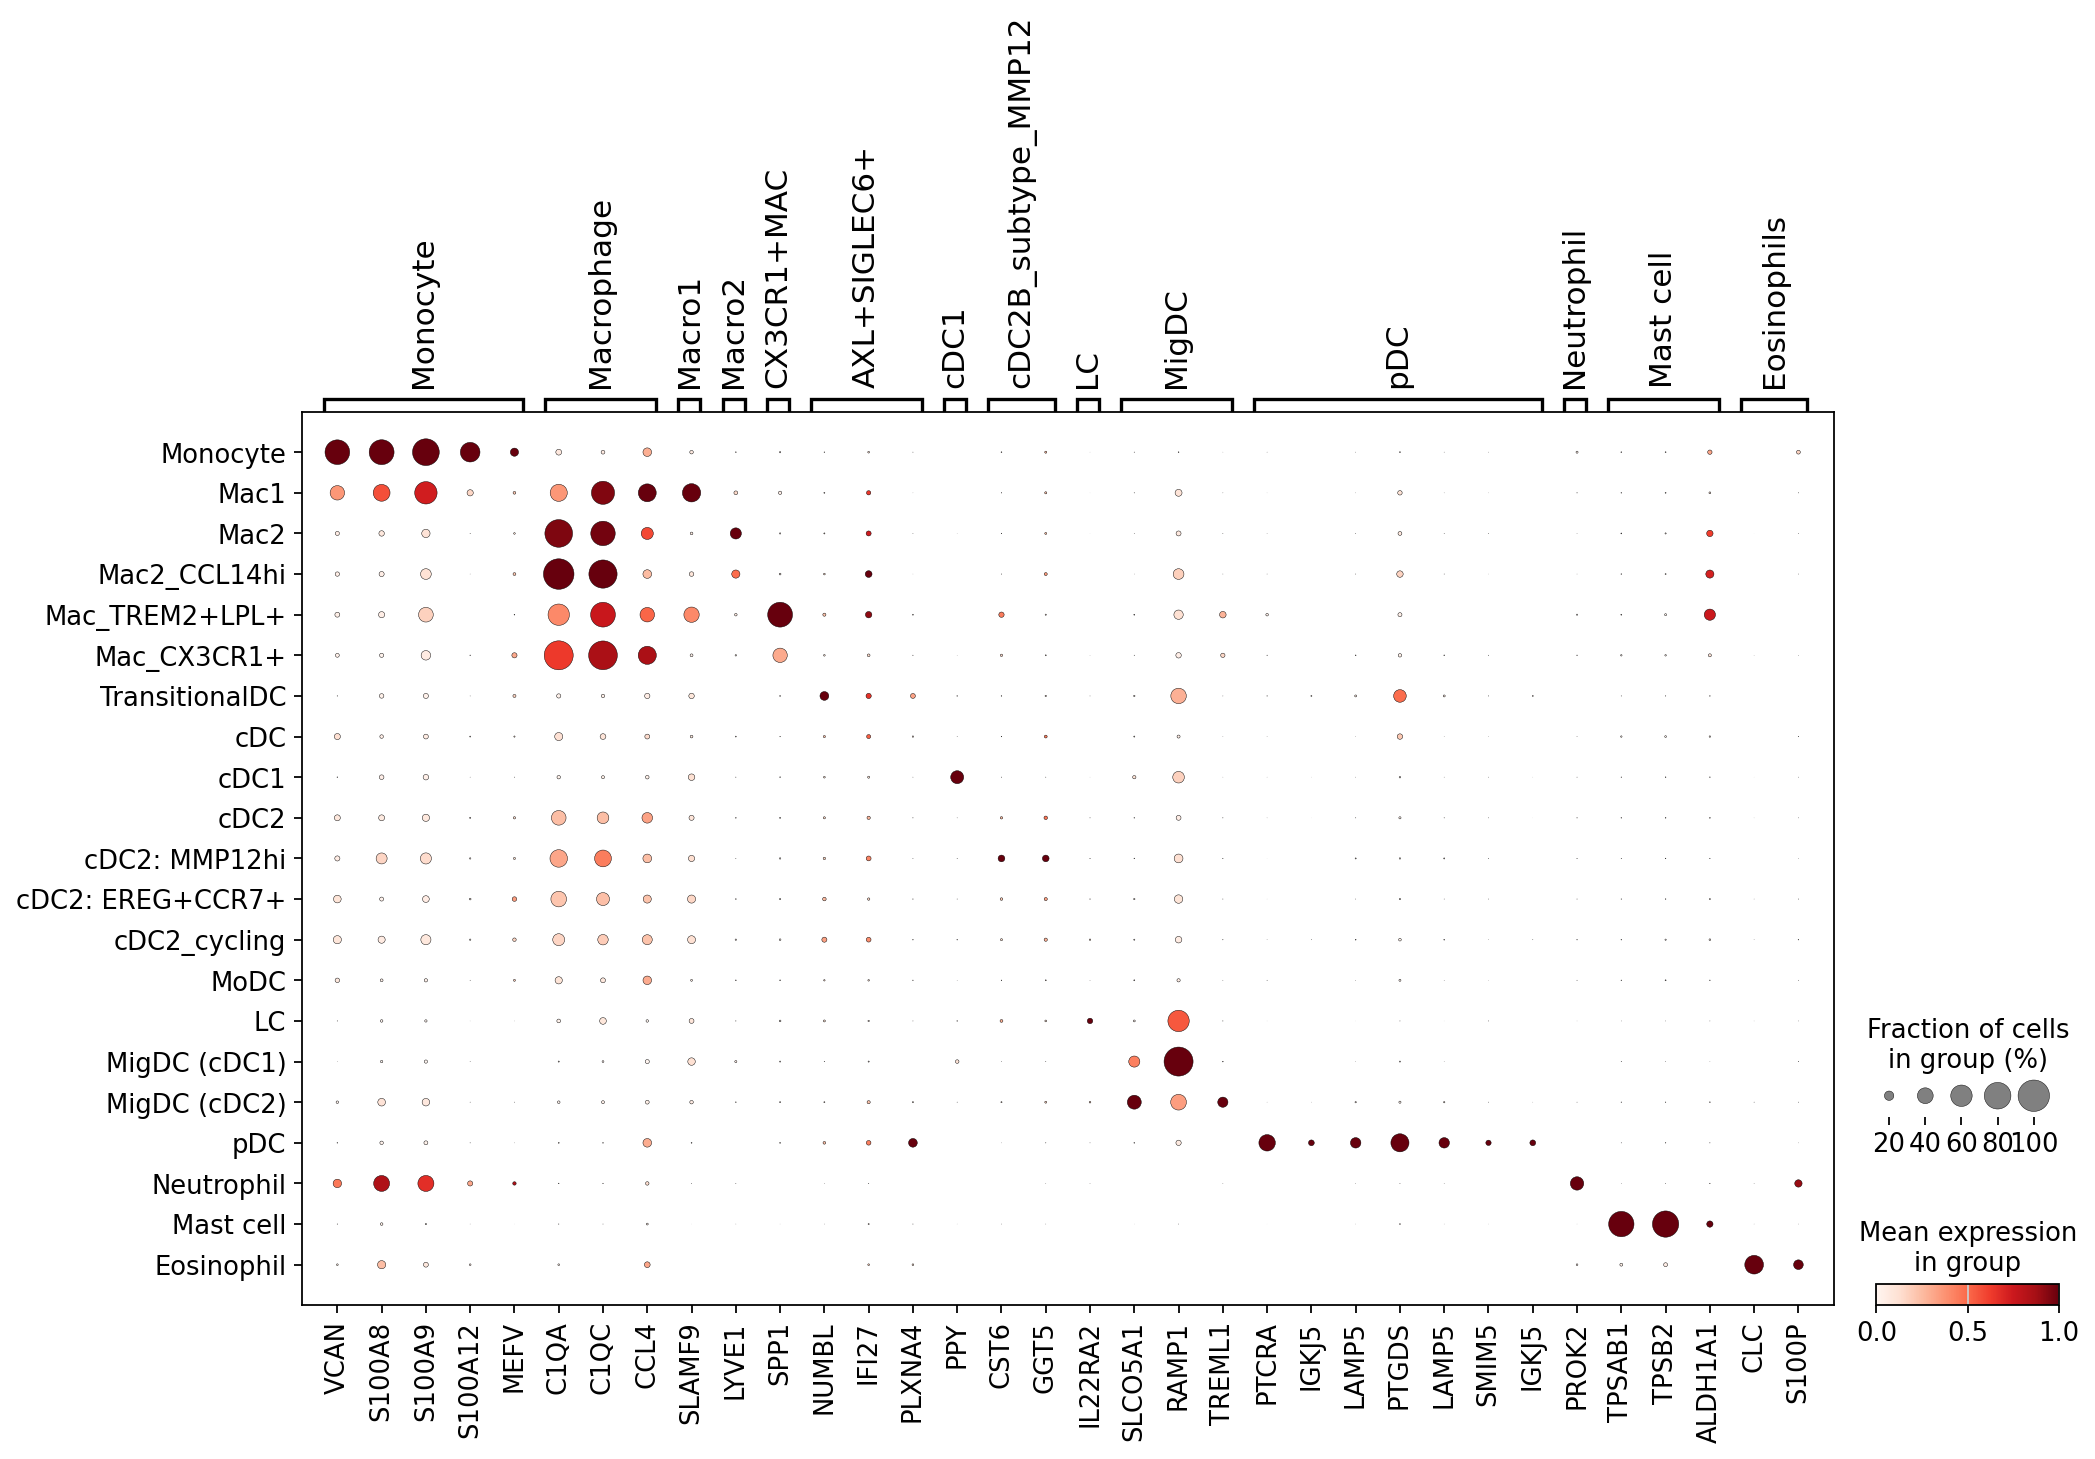

In [24]:
mac_markers={ 'Monocyte': ['CD14', 'VCAN', 'S100A8', 'S100A9', 
              'S100A12', "FCN1",'MEFV'], #"FCGR3A"
 #'Monocyte1': ['SERPINB2', 'MTF1', 'PTGER2'],
 #'Monocyte2': ['aaFCGR1A', 'SYT1', 'ASGR1', 'PRAM1', 'CCR2'],
# 'Mono_KC': ['KRT16', 'EGFR'],
 'Macrophage': ['C1QA', 'C1QC',  'CD163', 'CCL4', "STAB1",'MARCO', ],
      'Macro1': ['SLAMF9', 'TNFRSF6B',#"CXCL5", #"IL24"
                # "CCL24"
                ],

 'Macro2': ['MRC1','F13A1', "LYVE1","IGF1", "CCL13", 'CCL14', "CD209"],
 #'T': ['CD3E', 'CD96', 'TRBC1'],
 #'Macro_NEU4/LRRC32': ['CCL4L2', 'CCRL2', 'ACHE', 'NEU4', 'IL23A', 'CD40'],
# 'TREM2+ADAMDEC1+': ['TREM2', 'CXCL5', 'EPHB2', 'STAC', 'FAM20C'],
 'CX3CR1+MAC': ['TREM2', 'SPP1',  "LPL", 'CX3CR1', #'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               
                "P2RY12", #'ADAMDEC1',
                'FCGR3A', 
                'TGFBR1', 'PRKCH', 'CD93', 'HTRA1', "ADRB1",
                'GDF11', 'OLR1', 'ITGB3'
               ],
             'AXL+SIGLEC6+': ['AXL', 'SIGLEC6', 'NUMBL', 'IFI27', 'CXCR3', 'PLXNA4', 'KDR', "SELL",
                             "TNFSF4", "TCF4"],

 'cDC1': ['CLEC9A', 'XCR1', "ENPP1", "PPY", "BTLA", "TLR3"],
             "Mature cDC1": ["ITGAE", "CD8A"],
 'cDC2': ['CLEC10A', 'CD1B', 'CD1C', "CD163", 'CD1E', # 'CD5', 
          #'SPIB', 'TNFSF4', 'TSPAN2'
         ],

             'cDC2B_subtype_MMP12': ['MMP12', "CST6", "GGT5", "CARD9",  "ALOX15", "CXCL9",#'CROCC',
                   ],
              'cDC2B_subtype_EREG+': ["ITGAV","LAMB3", 
 "EREG",'IL1B', #'CROCC',
                                       #"SATB1",
                                     # "EHD1", "LUCAT1", "ITGAV", "OLR1", "TNFRSF4", "DOT1L", "DOCK4",
          #    "ADA", "MMP19", "ELK1", "LAMB3", "MIR3142HG", "GPR35",   "ISG20", "CXCL3", "MMP9",  
                   ],
                    "Cycling": ["TOP2A", "MKI67"],
             # 'MoDC': ["PLK2", "KLF2", "THBS1"
             #     #'THBS1',  'C1QTNF1', "INHBA", "TNFRSF4"
             # ],

 'LC': ['CD207','FCGBP', "EPCAM", 'CD1A', "SLC18A2", "TMEM45A", "IL22RA2","NMU" #"CLEC4A"
       ],
              'Migrating': ['CCR7', 'LAMP3',  ], 

 'MigDC': ['LY75', "CD200",  "BATF3",'SLCO5A1', 'WNT5B', 'ADAM12', "ACHE",
           "CD274", "PDCD1LG2",  "TNFSF4", "PVR", "RAMP1" , "EBI3","ICOSLG",
          "TREML1", "CD80", ],  #'ST8SIA1', 'CCL19', "CCL17", "CCL22",
         
     #"TFPI", "SERINC2", #"IL10",
          #'LILRA1', 'LILRA2'
             "MigDC(cDC2)": ["ANXA3"],
             "T_survival/attracting": ["IL12B", "IL15",  "CCL22", "CCL17", ],
 'pDC': ['CLEC4C',  #'IL3RA', 'TNFRSF21', 
         
         'LILRA4', 'PTCRA', 'IGKJ5', 'LAMP5', "P2RY6",# "ITGAE", 
         "PTGDS",'LAMP5', 'TLR9',  'SMIM5', 'IGKJ5', 'EPDR1',],
 'Neutrophil': [#'CXCL8',
     'FCGR3B', "CXCR2", "PROK2", "OSM",  #KCNJ15, ADGRG3
        "AQP9",
    "KCNJ15",
 
    #"CXCL12",
    #"LILRB4",
    #"SLIT3",
    "CSF3R",
    #"TNFSF13B",
   # "TNFSF10",
    "PADI4",
                # "MPO"
               ], 
                      #(adata.obs[CATEGORY]== "Neutrophil")]
              "Mast cell": [#"HPGDS", "KIT", "HPGD",
                    "HDC", #"GATA2",   
                    "TPSAB1", "TPSB2", "MS4A2","MRGPRX2",
                              "CALB2", "ALDH1A1" #"CAVIN2", "HEY1"
                ],
            "Eosinophils": [ "CLC", "CCR3",#"CCL23",    #"PTGDR2", "P2RY1", 
                            "S100P",
                             "IL4",
    "IL13",
    "ETS1",
    "KLF5",
    "NTRK1",
    "KCNJ2",
    "IPO11",
    "CYP11A1",
    "TNFSF11",
    "OSM"
                           ],
            #"OTHER": ["SECISBP2L"],
      
            }

adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()


dict2 = remove_markers(mac_markers)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in mac_markers.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}




sc.pl.dotplot(adata_i, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                           save="mac_scrnaONLY.pdf"

 

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )
 

# KCs (Interfollicular)

In [25]:
adata_i = adata[(adata.obs["lvl1_new"]=="KC")#|
              # (adata.obs[CATEGORY].str.startswith("KC"))
               ]
adata_i = adata_i[~adata_i.obs[CATEGORY].str.startswith("KC_")
               ]
adata_i.shape


(575249, 32732)

In [26]:

desired_order = ['KC1','KC1/2','KC1/2_cycling',"KC1-2_cycling",
 'KC2',     'KC2/3_cycling',    
    'KC3',
             'KC4',
     
           'KC5',
        'KCinflamm_basal',
 'KCinflamm_int',
                  'KCinflamm_late','KCinflamm_int/late',
 'KCinflamm_cycling',

               
 'KC_HF: Basal_LGR5+','KC_HF: Basal LGR5+',
 'KC_HF: Basal_NPNT+','KC_HF: ORS-0',
'KC_HF: ORS 1/2',
 'KC_HF: ORS/CL','KC_HF_CL', 

 'KC_HF: IRS+HS', 'KC_HF_IRS/HS', 'KC_HF: IRS',
'KC_HF: HS', 'KC_HF_cycling',
                                 'KCinflamm_Sebocyte_basal',  'KC_Sebocyte_basal','KC_Sebocyte_int',
                 'KC_Sebocyte_duct_basal/outer',
'KC_Sebocyte_PPARG+_basal/outer',
'KC*_Sebocyte',



 'KC_Sebocyte_inner','KC_Sebocyte_inner2',
'KC_Sebocyte_inner1','KC_Sebocyte_cycling','KC_Sebocyte_duct_inner',

'KC_Sebocyte_duct_outer', #'KC_Sebocyte_duct_basal/outer',
'KC_Sebocyte_PPARG+_basal',

'KC_Sebocyte_PPARG+_basal_cycling',

'KChf/cycling/ KC_Sebocyte_PPARG+_inner',
                
 'Sweat gland channel outer',    'Sweat gland channel outer_cycling',  'Sweat gland channel inner',
 'Sweat gland','KC_SC: LGR6+ACTA2+',
                 
                 
                
'KC/lowq_mastcell','KC_cycling/Mac_doublet','KC/lowq_melanocyte/T','KC*',
                 'KC_Outlier?','KC/lowq_mac_doublet','Sweat gland_plasma doublet'
,'KChf_cycling', "missing", "KC"





]

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
 

/tmp/ipykernel_2492441/269290774.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/269290774.py:55: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/269290774.py:68: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs[CATEGORY] = pd.Categorical(


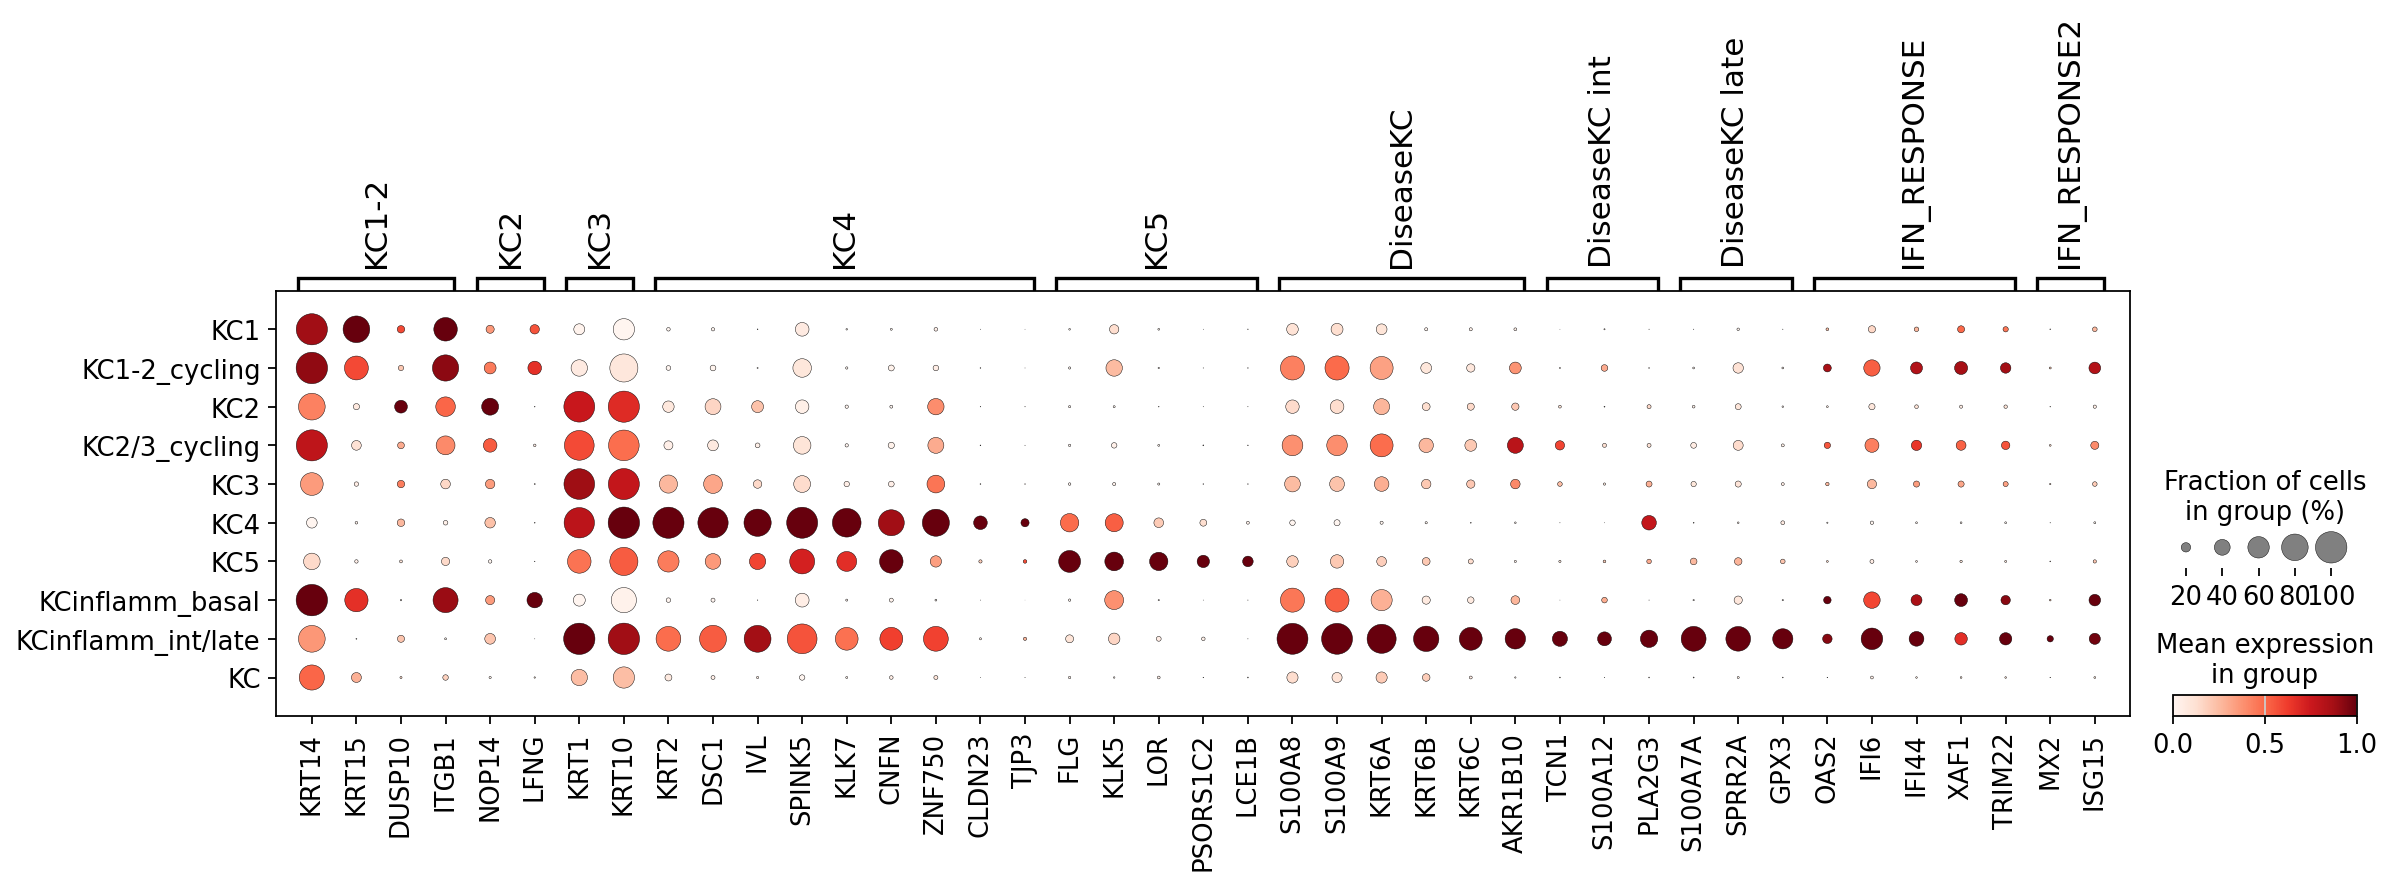

In [27]:
kc_markers={
   "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 'KC1-2': ['COL17A1', "KRT14",   'KRT15', "WNT3", "WNT4", 
                                        "DLL1", 'DUSP6',"DUSP10", "JAG1", "ITGB1"
                                              
                                              ],
 #   "KRT9": ["KRT9"],
 'KC2': ['BNC1', 'NOP14',         "LFNG",],
 'KC3': ['KRT1', 'KRT10', "MYCL", "DSG1"],
 'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
         ],
 'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
     "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
          
    
 'DiseaseKC': ['S100A8',
  'S100A9',
  'KRT6A',
  'KRT6B',
  'KRT6C',
  'OAS1',  'SERPINB4','AKR1B10', "CLEC7A",# "TLR3", "TLR5", 
              # "STAT1", 'STAT2', 'IRF7',
               "CGAS", 
              ],
# 'DiseaseKC basal': ['RTP4',"MX1",],
  "DiseaseKC int": [ "TCN1", "S100A12", "PLA2G3" ], 
 'DiseaseKC late': [
  'S100A7A',
  'SPRR2A',
  'GPX3',"DEFB4A", "CCL20"
 #"SERPINB11",
 ],
    "IFN_RESPONSE":  ["OAS1", "OAS2", "OAS3", #"IFI27",
                      "IFI6",  "IFI44",
                "MX1", #"NMI", 
                      "XAF1", "IFI44L", "LTB4R2",
               "TRIM22", "IFIT3", "APOL1", "IFIT1",
            
               ] ,
    "IFN_RESPONSE2": ['MX2', 'IRF7', 'ISG15', 'STAT1'],
   # "LAG3+": ["LAG3", "KRT31", "TRNP1"],
    #"Psoriasis specific":   'IFI6',  'MX1',  'KYNU',
         #    "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
         # "KC_HF": ["LHX2", "RARRES2", "KRT15",],

#              'KC_HF: Basal': [ "CD200", 'NPNT'],
#                 "KC_HF: NPNT+": ['PCDH20', #'SERPINF1', 
#                                  'FBLN2',
#                                  #"WIF1"
#                                 ],
#              'KC_HF: LGR5+': ['LGR5', 'GLI2', "CNTN6", "GREM1", 'IL31RA'],
#  'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
#  'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
#                  "SHH",  'MSI1',
#   'MYCN',

#   #'SOX11',
#                  ],
#     "HS": ["TGM1", "KRT82", "KRT35", "KRT23"],

#     'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
#                  "FST", "ANGPTL2",],
#      'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", "GATA6", "SERPINB4"],
# # 'KC_Sebocyte_duct_outer_cycling': [''],

#      'KC_Sebocyte_duct_outer': ['CDH22', "CCL27", "LGR6", "IRF1", "ITGB1", "DLL1",],

#  'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
#      'KC_Sebocyte_PPARG+_basal': ['ALCAM', "TGFBR3", "PPARA", "LRG1", "FZD4", "HSD11B1" , "ACACB", "PC", "PLIN4",
#                              "MAOA", "FADS1", "PM20D1", "NNAT", "CD14", "CLSTN3", "FAM107A"],
#  'KC_Sebocyte_PPARG+_inner': ['GAL', "PDZK1", "CUX2", "ABTB2", "ADM", "CYP4F2", "SEC14L3", "SMPD3", "TNNT2",
#                              "DMBX1", "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
#                              ],
#     "Sebocyte_basal": ["TINAGL1",  "DLK2",  "CDH22" , "NNAT", "CCL19", #"CCL22",
#                  "VCAM1", "LIPG", "CCDC61",],
#     "Sebocyte_inner":  [ "GAL", "FADS1", "FADS2",   "PM20D1", "PLIN4", "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3",
#                      'PPARG',],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
        
#     "Channel_outer":  [ "PTGFR", "ITGB2", "TG", "ADRB2"],
#             "Channel_inner": [ "CFTR",  "CRHR1", "GPR12"],
    
#  'Sweat_gland': ["PPARGC1A",'KRT7', 'KRT19','DCD', #"SLC12A2",
#                  "PPP1R1B", "AQP5"], 
    
                               
#  'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
#            'MPPED2',#'KCNQ5',
#           'LTBP2', #'IGFBP2', 
#            'TGFB1I1',#'MCAM',
#            'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2"],
    

#  #"Gland": [ ],
    # "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

}

adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()







dict2 = remove_markers(kc_markers)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in kc_markers.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}




sc.pl.dotplot(adata_i, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                           save="KC_scrnaONLY.pdf"

 

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )
 
 

# KC Appendage

In [50]:
adata_i = adata[(adata.obs["lvl1_new"]=="KC_HF")|
            (adata.obs["lvl1_new"]=="Sweat gland")
               ]

adata_i.obs[CATEGORY].value_counts()


lvl5_annotation
Sweat gland channel outer         19621
Sweat gland                       19599
KC_HF: ORS0                       10582
KC_Sebocyte_DuctOuter              8797
KC_Sebocyte_DuctInner              6924
Sweat gland channel inner          5230
KC_Sebocyte_GlandBasal             4844
Sweat gland Myoepithelial          1875
KC_HF: ORS2                        1169
KC_HF: ORS_junction                1071
KC_Sebocyte_DuctInner_Junction      908
KC_HF: ORS1                         856
KC_HF: HFSC                         490
KC_HF: Matrix                       455
KC_HF: IRS1                         401
KC_HF: HS                           344
KC_HF: SPON2+                       222
KC_Sebocyte_GlandInner               78
KC_HF: IRS0                           6
KC_HF: IRS_Cuticle                    5
Name: count, dtype: int64

In [51]:
from collections import OrderedDict  

desired_order = [
    'KC1', 'KC1/2', 'KC1/2_cycling', 'KC1-2_cycling',
    'KC2', 'KC2/3_cycling', 'KC3', 'KC4', 'KC5',
    'KCinflamm_basal', 'KCinflamm_int', 'KCinflamm_late',
    'KCinflamm_int/late', 'KCinflamm_cycling',
    
 'KC_HF: HFSC',
    'KC_HF: Basal_LGR5+', 'KC_HF: Basal LGR5+','KC_HF: ORS-Bulb/infundibulum', 'KC_HF_SPON2',
    'KC_HF: SPON2+', 
    
    'KC_HF: Basal_NPNT+', 'KC_HF: ORS-0', 'KC_HF: ORS0',
    'KC_HF: ORS1', 'KC_HF: ORS2',   'KC_HF: ORS2i', 'KC_HF: ORS 1/2',
    'KC_HF: ORS1/2', 'KC: HF ORS1/2', 'KC_HF: ORS_cycling',
    'KC_HF: ORS/CL', 'KC_HF_CL',
     'KC_HF: ORS_junction', 
      'KC_HF: IRS0',    'KC_HF: IRS1',

    'KC_HF: IRS+HS', 'KC_HF_IRS/HS',   'KC_HF: IRS_Cuticle', 'KC_HF: IRS',
       'KC_HF: IRS_Sebo_doublet?',
    'KC_HF: IRS_cycling', 'KC_HF: Matrix', 'KC_HF: IRS_TCHH+',
    'KC_HF: HS', 'KC_HF: HS1',  'KC_HF_cycling', 'KC_HF: HS2',    'KC_HS: HS_TRPV1+',
    'KCinflamm_Sebocyte_basal', 'KC_Sebocyte_basal',
    'KC_Sebocyte_duct_basal/outer', 'KC_SebocyteDuct_Outer',
    'KC_Sebocyte_duct_outer', 'KC_SebocyteDuct_Outer-LOWQ',
    'KC*_Sebocyte',
    'KC_Sebocyte_inner', 'KC_Sebocyte_inner2',
    'KC_Sebocyte_inner1', 

      'KC_Sebocyte_DuctOuter',
      'KC_Sebocyte_DuctInner', 
    'KC_Sebocyte_duct_inner', 'KC_SebocyteDuct_Inner',
    'KC_SebocyteDuct_Outer/HF_Junction',
    'KC_SebocyteDuct_Outer/HF_junction2','KC_SebocyteDuct_Outer/HF_junction', 
 'KC_Sebocyte_DuctInner_Junction',

     'KC_Sebocyte_GlandBasal',
    'KC_Sebocyte_PPARG+_basal', 'KC_SebocyteGland_Outer','KC_SebocyteGland_outer',
    'KC_Sebocyte_PPARG+_basal_cycling',
    'KC_Sebocyte_PPARG+_basal/outer', 'KC_Sebocyte_int',
    'KChf/cycling/ KC_Sebocyte_PPARG+_inner','KC_Sebocyte_cycling',
      'KC_Sebocyte_GlandInner',
    'Sweat gland channel outer', 'Sweat gland channel cycling',
    'Sweat gland channel inner', 'Sweat gland',
    'KC_SC: LGR6+ACTA2+', 'Sweat gland Myoepithelial',
    'Sweat gland myoepithelial',
    'KC/lowq_mastcell', 'KC_cycling/Mac_doublet',
    'KC/lowq_melanocyte/T', 'KC*', 'KC_Outlier?',
    'KC/lowq_mac_doublet', 'Sweat gland_plasma doublet',
    'KChf_cycling', 'Sweat gland_cycling',
    "missing",'ASIC2+_Mechanoreceptor', 'Merkel cell',








]

# ------------------------------------------------------------------
# 2.  Remove duplicates *without* changing order
# ------------------------------------------------------------------
desired_order = list(dict.fromkeys(desired_order))  # or OrderedDict.fromkeys

# ------------------------------------------------------------------
# 3.  Ensure column is categorical
# ------------------------------------------------------------------
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category")

# ------------------------------------------------------------------
# 4.  Sanity-check: all data labels must be in desired_order
# ------------------------------------------------------------------
missing_labels = set(adata_i.obs[CATEGORY].unique()) - set(desired_order)
if missing_labels:
    raise ValueError(f"Labels present in data but missing from desired_order:\n{missing_labels}")

# ------------------------------------------------------------------
# 5.  Apply the ordering and drop unused categories
# ------------------------------------------------------------------
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True,
)
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].cat.remove_unused_categories()

adata_i.obs[CATEGORY].value_counts()



/tmp/ipykernel_2492441/899363897.py:71: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/899363897.py:84: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs[CATEGORY] = pd.Categorical(


lvl5_annotation
Sweat gland channel outer         19621
Sweat gland                       19599
KC_HF: ORS0                       10582
KC_Sebocyte_DuctOuter              8797
KC_Sebocyte_DuctInner              6924
Sweat gland channel inner          5230
KC_Sebocyte_GlandBasal             4844
Sweat gland Myoepithelial          1875
KC_HF: ORS2                        1169
KC_HF: ORS_junction                1071
KC_Sebocyte_DuctInner_Junction      908
KC_HF: ORS1                         856
KC_HF: HFSC                         490
KC_HF: Matrix                       455
KC_HF: IRS1                         401
KC_HF: HS                           344
KC_HF: SPON2+                       222
KC_Sebocyte_GlandInner               78
KC_HF: IRS0                           6
KC_HF: IRS_Cuticle                    5
Name: count, dtype: int64

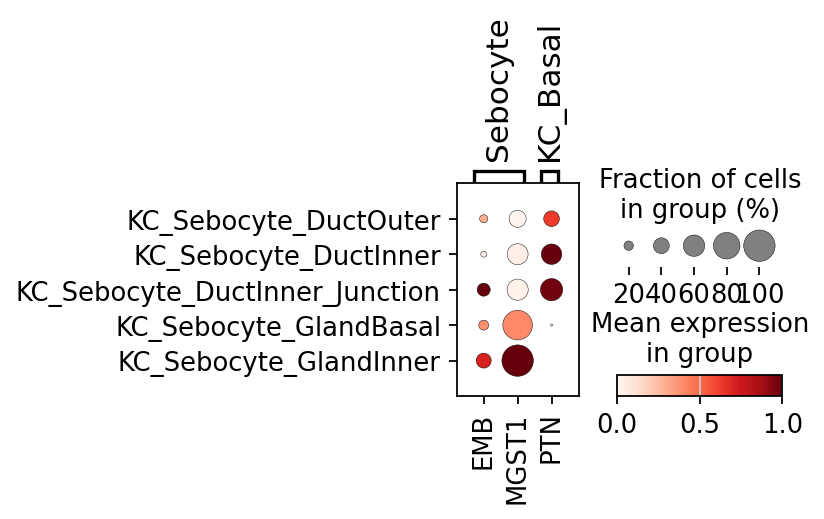

In [52]:
kc_markers={         "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
 'Sebocyte': [ "GATA6",  "EMB",   'MGST1', "AR", "MAOB",
                 #"FST", "ANGPTL2",  
                ],
 'KC_Basal': ['COL17A1',    "TINAGL1",  "DLK2",  "CDH22" , "PTN", "DLL1",  'CDH22', "LGR6", ],
 #   "KRT9": ["KRT9"],
 #'KC2': ['BNC1', 'NOP14'],
#  #'KC_Int': ['MYCL', 'ALOX12', "CDSN",],
#  'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
#          ],
#  'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
#      "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
        
    
#  # 'DiseaseKC': ['S100A8',
 #  'S100A9',
 #  'KRT6A',
 #  'KRT6B',
 #  'KRT6C',
 #  'OAS1',  'SERPINB4','AKR1B10', "CLEC7A",# "TLR3", "TLR5", 
 #              # "STAT1", 'STAT2', 'IRF7',
 #               "CGAS", 
 #              ],

 

   
         'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
                 #"VCAM1", "IRF1", "ITGB1", 
                                   ],
    
     'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
                                "SERPINB4", "LIPG", "CCDC61",  ],
            "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
                # "LGALSL",
                  "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
                  "SH3BGRL2",
                 "MYO5B"],
# 'KC_Sebocyte_duct_outer_cycling': [''],
 #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
            "PPARG+": [ 'PPARG',  "PPARA", "LRG1", "ACACB", "PC", 
                             "MAOA", "FADS1", "PM20D1",'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
                      "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3",
                      ],
     'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
 'KC_Sebocyte_PPARG+_inner': [  "PDZK1",  "DMBX1",
                              "CUX2", "ABTB2", "ADM", "CYP4F2", "SEC14L3", "SMPD3", "TNNT2",
                            "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
                             ],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
        
    

 #"Gland": [ ],
#     "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
#    # "Merkel": ["ATOH1", "KRT20"],
#   #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
#     "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
#                                 #  "MYBL2", "TPX2"
#                                   ], 
    
#     "IFN_RESPONSE":  ["OAS1", "OAS2", "OAS3", #"IFI27",
#                       "IFI6",  "IFI44",
#                 "MX1", #"NMI", 
#                       "XAF1", "IFI44L", "LTB4R2",
#                "TRIM22", "IFIT3", "APOL1", "IFIT1",
            
#                ] ,
}

adata_ii=adata_i[(adata_i.obs[CATEGORY].str.startswith("KC_S"))|
                (adata_i.obs[CATEGORY].str.startswith("KCinflamm_S"))
                 #(adata_i.obs[CATEGORY].str.startswith("KChf"))
                ]


dict2 = remove_markers(kc_markers)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in kc_markers.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}




sc.pl.dotplot(adata_ii, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                           save="KCsebo_scrnaONLY.pdf"

 

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )
 
 


# kc_hf

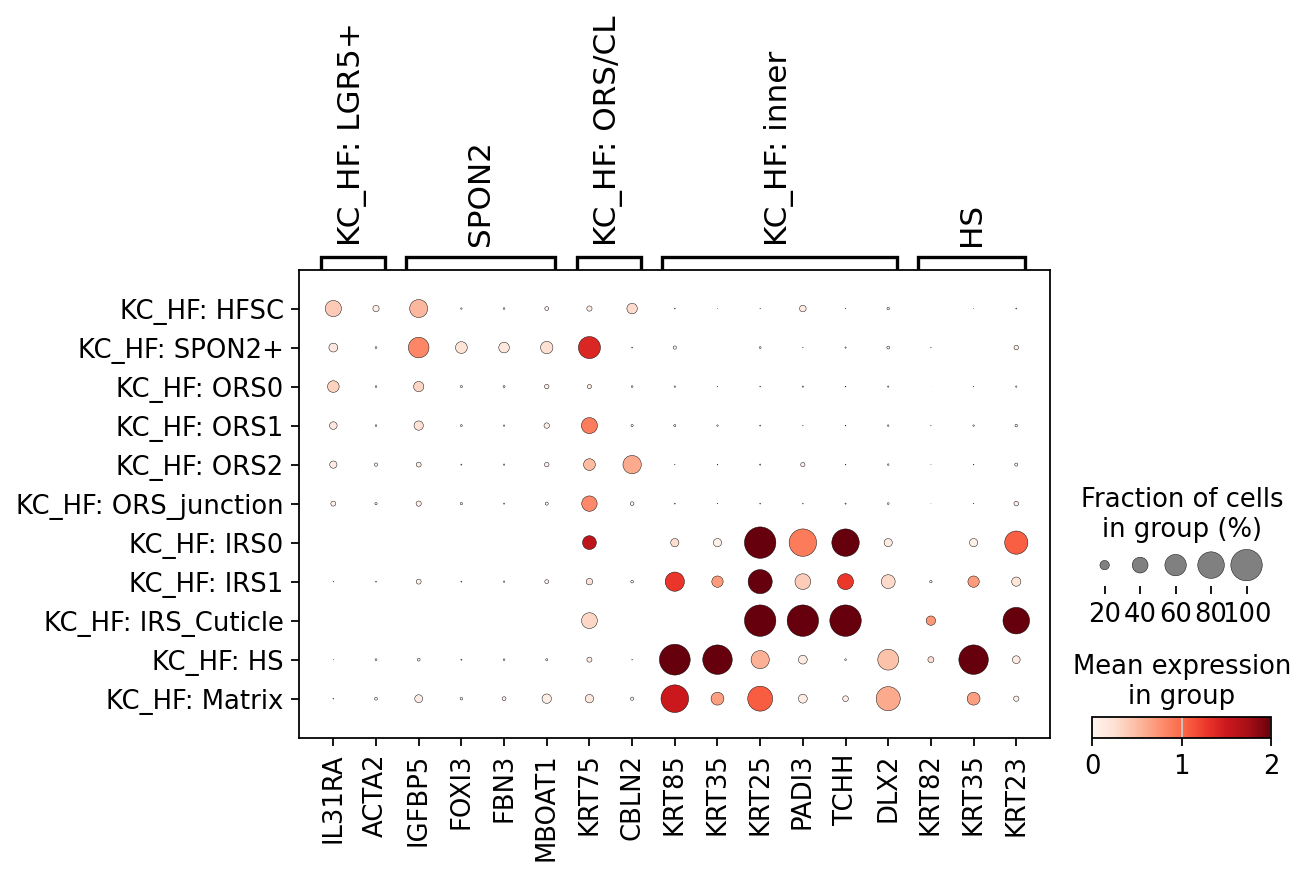

In [57]:
ORDER=[  'KC_HF: HFSC', 'KC_HF: SPON2+',
       'KC_HF: ORS0',
 'KC_HF: ORS1',
 'KC_HF: ORS2',
       
 'KC_HF: ORS_junction','KC_HF: ORS_cycling',
      





      
       'KC_HF: IRS0',
 'KC_HF: IRS1',
 'KC_HF: IRS_Cuticle', 'KC_HF: HS', 'KC_HF: Matrix', 
      ]
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST
kc_markers={
#  'KC1-2': ['COL17A1',  ],
#  #   "KRT9": ["KRT9"],
#  # #'KC2': ['BNC1', 'NOP14'],
#  # 'KC3': ['KRT1', 'KRT10', "MYCL", "DSG1"],
#  # 'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
#  #         ],
#  # 'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
         
    

   
#             "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
#          "KC_HF": ["LHX2", "RARRES2", "KRT15",],

         
     'KC_HF: LGR5+': ['LGR5', 'GLI2', "CNTN6", "GREM1", 'IL31RA',
                             "COMP", "MEST", "RAI14", "AEBP1", "OLFML3", "LTBP2", "ACTA2"
                             ],
    
        "SPON2":  [ "SPON2", "IGFBP5", "WNT5B", "DIO2", "F2R", "BAALC","NPY1R",#"EDIL3", 
                   'INHBA', 'WNT5B', 'FOXI3', 'FBN3', 'MBOAT1'
                   
                  
                  ],
        'KC_HF: ORS0': [ "CD200", 'NPNT'],
    
                "KC_HF: NPNT+": ['PCDH20', #'SERPINF1', 
                                 'FBLN2',
                                 #"WIF1"
                                ],


            
 'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
   #      "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
        "Junction": ["SLC15A1", "SCNN1A", #"GATA6",
                     "SLCO2B1", "TYMP", "GPT"],

     'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
                 "SHH",  'MSI1',
                 

  #'SOX11',
                 ],
    
    'KC_HF: IRS0':    ["SHH", "TGFA", "GDA", "HPGD", "SMOX",
        "GSDMC", 
      "CDA"],
      'KC_HF: IRS1':    [ "FLRT3", "NT5E", "GPR37", "ABCA4", "CRNN",
  'MYCN',],


       "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    "Cuticle":[
        "KCNN4",  "PADI2", "B3GAT1", "IL6R", 
        "SERPINA3", "KLK6", "TRPV1", "SLAMF7",
       "IL37", "CALB2", "GABRP",
         "TGFA", "GDA", "HPGD", "SMOX",
        "GSDMC", 
        "POU5F1", "CDA"
    ],
    "HS": ["TGM1", "KRT82", "KRT35", "KRT23",
          "RETREG1", "F12", "VSNL1", "GNAI1", "REEP6","PARM1", "CD200",
          ],
 

#     'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
#                  "FST", "ANGPTL2",],


#  'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
#            'MPPED2',#'KCNQ5',
#           'LTBP2', #'IGFBP2', 
#            'TGFB1I1',#'MCAM',
#            'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2"],

 #"Gland": [ ],
  #  "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               

}


dict2 = remove_markers(kc_markers)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in kc_markers.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}


adata_ii=adata[#adata_i.obs[CATEGORY].str.startswith("Sweat")|
                adata.obs[CATEGORY].str.startswith("KC_HF")
    #adata_i.obs[CATEGORY].str.startswith(   'KC_SC')

              
               
               ]

sc.pl.dotplot(adata_ii, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                #standard_scale="var",
                           save="KChf_scrnaONLY.pdf",

              vmax=2,
 

             categories_order = [x for x in ORDER if x in adata_ii.obs[CATEGORY].unique()]

             )
 
 




# SWEAT GLAND

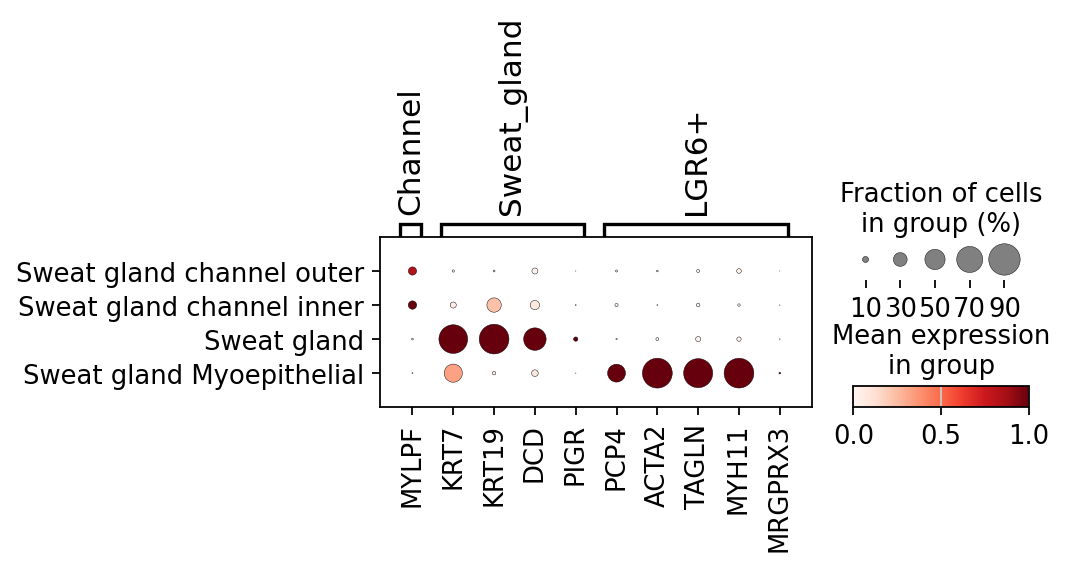

In [33]:
kc_markers={     'Channel': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
                        ],
        
    "Channel_outer":  ['COL17A1', "PTGFR", "ITGB2", "TG", "ADRB2"],
            "Channel_inner": [ "CFTR",  #"CRHR1",
                              "GPR12", 'FGFBP2', 'MAL', ],
    
 'Sweat_gland': ["PPARGC1A",'KRT7', 'KRT19','DCD', #"SLC12A2",
                 "PPP1R1B", "AQP5", "PIGR"], 
    
                               
 'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
           'MPPED2',#'KCNQ5',
          'LTBP2', #'IGFBP2', 
           'TGFB1I1',#'MCAM',
           'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2",  "MRGPRX3"],
    

 #"Gland": [ ],
    #"KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

}

adata_ii=adata_i[adata_i.obs[CATEGORY].str.startswith("Sweat")|
                adata_i.obs[CATEGORY].str.startswith("KChf")|
                                 adata_i.obs[CATEGORY].str.startswith(   'KC_SC')

              
               
               ]

dict2 = remove_markers(kc_markers)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in kc_markers.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}




sc.pl.dotplot(adata_ii, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                           save="KCsweat_scrnaONLY.pdf"

 

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )
 
 


# vascular

In [34]:
adata.obs.lvl1_new.value_counts()

lvl1_new
KC                    575249
Fibroblast            345402
VE/Pericyte/muscle    234584
T                     216068
Myeloid               200136
Sweat gland            46325
Other                  38091
KC_HF                  37152
VE                     24050
Schwann                 7202
B                       2825
ILC                     2113
Tnaive_CD8              1741
Name: count, dtype: int64

In [35]:
adata_i = adata[(adata.obs["lvl1_new"]=='Endothelium+pericyte+muscle')|
                (adata.obs["lvl0"]=="Endothelium/pericyte/muscle")|
                (adata.obs[CATEGORY]=="Smooth muscle")|
                (adata.obs[CATEGORY]=="Skeletal muscle")|
                (adata.obs[CATEGORY]=="Satellite muscle")|
                (adata.obs["lvl0"]=="VE/Pericyte")
              
               
               ]
adata_i.shape


(256657, 32732)

In [36]:

# ------------------------------------------------------------------
# 1.  Desired order (drop duplicates without shuffling)
# ------------------------------------------------------------------
desired_order = list(OrderedDict.fromkeys([
    'Pericyte1_CCL19+', 'Pericyte1',
    'Pericyte2_CASQ2+', 'Pericyte2 (VSMC)', 'Pericyte2_VSMC',
    'Smooth muscle',
    'VE1_ADAMTS6_Art', 'VE1_Art', 'VE1_HEY1_art',
    'VE2', 'VE3_SELPhi_CCL23+', 'VE3_SELPhi_venule', 'VE3_Ven',
    'VE3_SELPhi', 'VE3_APLNhi', 'VE3_APLNhi_prolif', 'VE3_Prolif_APLN+', 'VE4_Cap_APLN+',
    'VE3_SELP_CD36+PPARG+', 'VE3_Ven_APLN+',
    'VE4_Cap', 'VE4_cap_CA4', 'VE4_Cap_CA4+',
    'LE1', 'LE',
    'Skeletal muscle', 'Satellite muscle',
    'VE*/pericyte',
    'VE3_CA4hi_cap', 'VE_lowq', 'VE_APLN_PLA1A_PTGDS/ F3 merge',
    'VE1', 'VE3_SELPhi_CD300LG', 'VE3/LE',
    'Vasc_Mural_doublet', 'VE1_GJA5hi',
    'Pericyte*', 'VE3_SELPhi_5', 'Pericyte/T doublet', 'Pericyte_LOWQ?',
    "missing"
]))

# ------------------------------------------------------------------
# 2.  Make column categorical & drop empty categories
# ------------------------------------------------------------------
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category")
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].cat.set_categories(desired_order, ordered=True)
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].cat.remove_unused_categories()



/tmp/ipykernel_2492441/3729714061.py:26: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category")


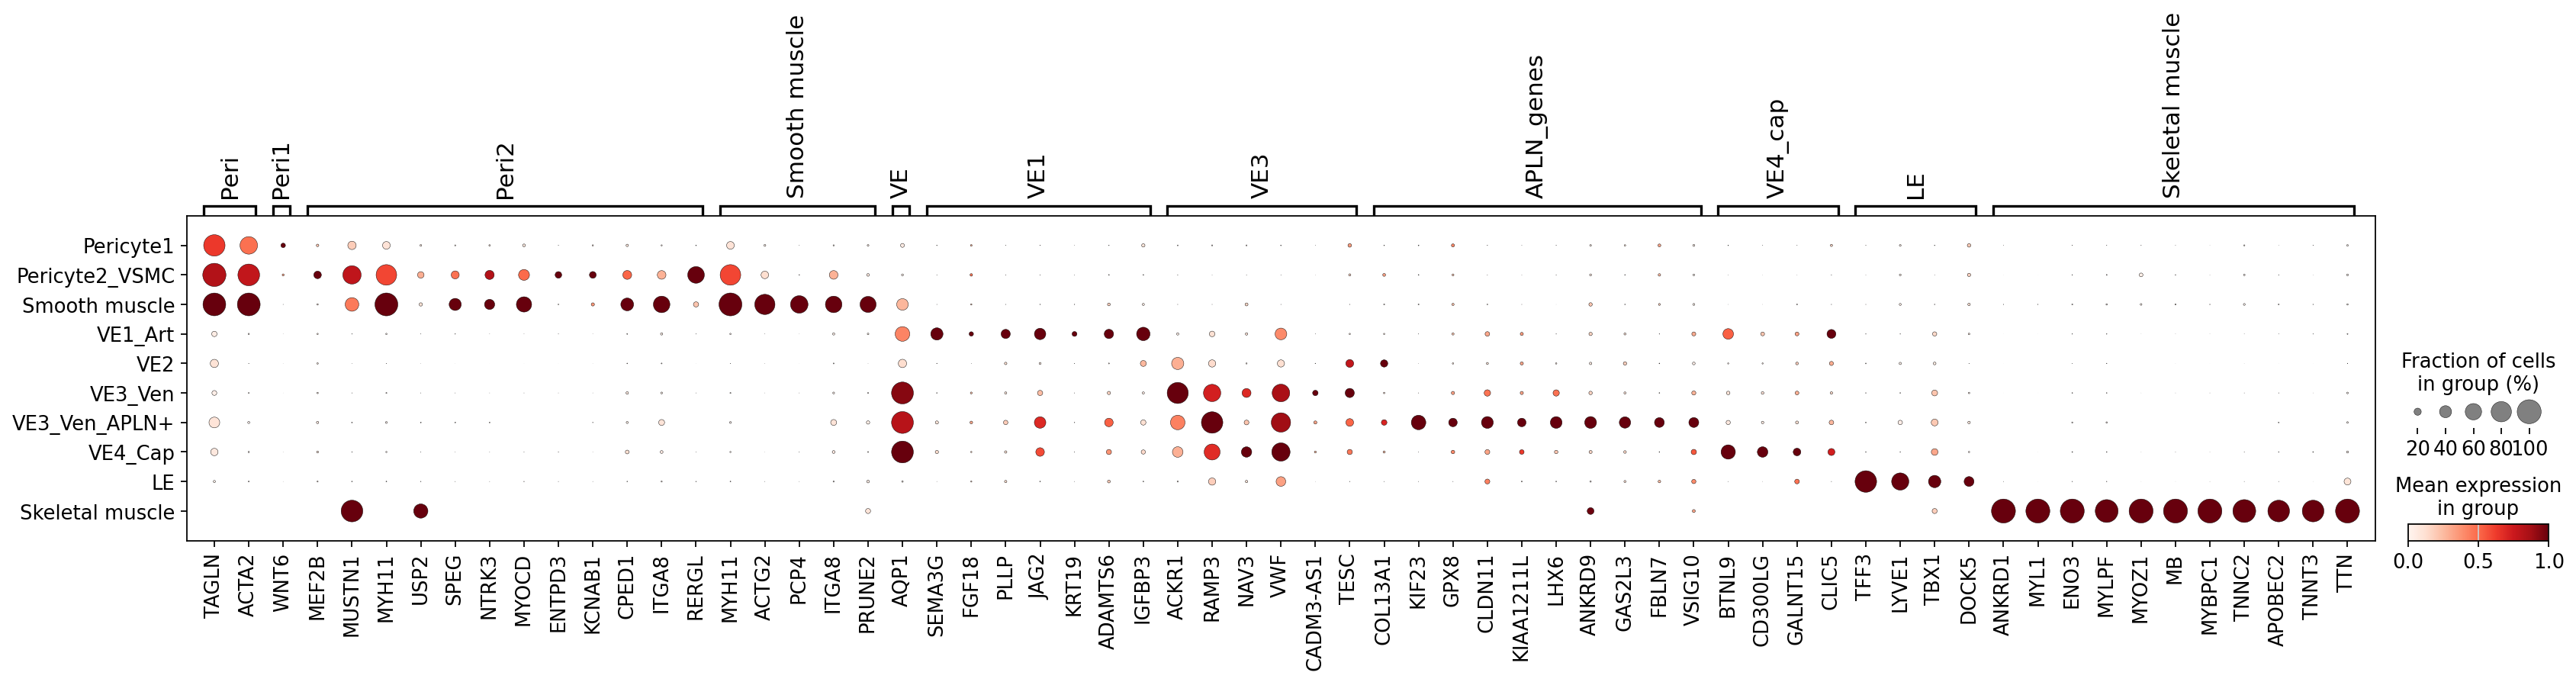

In [37]:
vasc_markers_new = {"Peri": ["PDGFRB", "RGS5", "TAGLN", "ACTA2", "ADRA2A", "NOTCH3", "CCL8"],
                    "Peri1": [ "CCL19", "ANPEP", "PTGES", "WNT6", "NGFR", "ADAMTS2", "COL23A1", "TMEM119", "ADCYAP1R1"],
                    "Peri2": ["CASQ2", "MEF2B", "MUSTN1", "MYH11", "SGCA", "USP2","PLN", "KCNA5" ,"SPEG", "NTRK3", "MYOCD", "ENTPD3", "KCNAB1", "CPED1", "ITGA8", "RERGL",
                             ],
                       
"Smooth muscle": [  "MYH11", "ACTG2", "PCP4", "ITGA8", "PRUNE2", "NTN1",
                 'ADRA1A',
  'JPH2',
 # 'FGFR2',
  #'ALDH1B1',
  #'SLMAP',
  'P2RX1',
  #'NTN1', 'MYL9', 'MFAP4', 'PCDH7'
                 ],
                    
                    
                  #  "Peri1+VE": ["ADGRF5"],
                    "Endothelium": ["PECAM1", "CDH5"],
                    "VE": ["CD34", "PLVAP", "SOX17","AQP1",],
                    "VE1": ["NEBL", "FBLN5", "SEMA3G", "GJA5", "FGF18", "PLLP", "JAG2", "KRT19", 
                            "ADAMTS6", "HEY1", #"KCNJ2", 
                            "IGFBP3", #"PTGS2"
                           ],
                    #"VE2": ["PLOD1",  "KCNJ15", "ST6GALNAC4", "TOMM34", "COL13A1"],
                    #"VE2+LE2+": ["ARG2", "GARS", "F2RL3", "TUBG2", ],
                    "VE3": [# "LRG1", "VCAM1", "SLCO2A1", 
                        "SELP", "SELE", "CD14", #"LRG1",  "CD300LG", "DSG2",
                           "ACKR1", "NOSTRIN", #"MATN2", "PCDH19", "CADM3-AS1" ,"LHX6",
                        "TIAM1", #"INHBB",
                        "CCL14",
                        "CCL23", #"IGFBP2", 
                           "RAMP3","NAV3", "VWF",     "CADM3-AS1", "INHBB", "TESC"
                    ],
                    'APLN_genes': [ "APLN", "COL13A1", "MKI67", "KIF23", "TPX2",
                                   'GPX8', 'CXCL12','CLDN11', 'KIAA1211L', "APLNR",
                                       "HTRA1", "APOL1",  # "PBK",  "PRC1",  "GGH",   
    "LHX6",
#™ "TYMS",  
  # "GOLM1", "TK1",    "DIAPH3","ANLN", 
    "ANKRD9","OAS3",
    "F2R",   "GAS2L3",   "FBLN7",
   # "MNS1", "CLN6", 
    "VSIG10",
                                   #"TYMS", "TK1", "NUSAP1", "CENPF", "PRC1", "MKI67", "ZWINT", "TPX2", "CENPM", "LMNB2", "KIF23", "MXD3", "FANCI", "PCLAF", 
               # "CCNA2",
              #"PLA1A", 
                                  ],
                    
                "VE4_cap": ["BTNL9", "CA4", "CD300LG", "CD36", "GALNT15",  "AQP7", "CLIC5","KCNB1",# "LRMP",#"SPAAR", "CHRM3", "TNMD", "PHYHIPL"
                           ],
                       "LE": ["PROX1", "TFF3", "LYVE1", "PDPN", "CAVIN2", "MRC1", "COLEC12", "TBX1", "DOCK5", "TNFRSF11A"],
                    #  "Vasc mural":  ["ACTA2", "TAGLN", "NOTCH3", "RGS5", "MCAM", "TINAGL1", "MUSTN1", "ANGPT2", "SORBS2" , "BCAM", "PDGFA", "GJA4", "PARM1", "COX4I1", "RERGL", "CDH6", "ESAM", "AOC3", "PLN","ADGRF5", 
                    #"CASQ2", "CCL8", "NGF", "MYH8", "MYH11"],
                    #"OTHER": ["HLA-DRA", "CD74"]
                    "Skeletal muscle": ["ANKRD1", "MYL1", "ENO3", "MYLPF", 'MYOZ1',
                                       'MB', 'MYBPC1', 'TNNC2', 'APOBEC2', 'TNNT3',
                                       'S100A1', 'TTN'],
  #                    'Satellite muscle': ['FGFR4',
  # 'SERPINA3',
  # 'MEST',
  # 'H19',
  # 'PAX7',
  # 'DLK1',
  # 'SIX1',
  # 'PITX2'],
  #                   "extra":["PGF", "CXCR4", "ESM1", "CYTL1"],
                   }

dict2 = remove_markers(vasc_markers_new)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in vasc_markers_new.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}




sc.pl.dotplot(adata_i, 
              SCRNA_ONLY,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
                           save="vasc_scrnaONLY.pdf"

 

             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )
 
 


# Fibroblasts

In [38]:
CATEGORY

'lvl5_annotation'

In [39]:
adata_i = adata[adata.obs["lvl5_annotation"].str.startswith("F")
               # (adata.obs["annotation"]=="Smooth muscle")|
                #(adata.obs["annotation"]=="Skeletal muscle")|
                #(adata.obs["annotation"]=="Satellite muscle")
               ]


adata_i.shape

adata_5k_i = adata_5k[adata_5k.obs["lvl0"]=="Fibroblast"
               # (adata.obs["annotation"]=="Smooth muscle")|
                #(adata.obs["annotation"]=="Skeletal muscle")|
                #(adata.obs["annotation"]=="Satellite muscle")
               ]
adata_5k_i.obs[CATEGORY].value_counts()

lvl5_annotation
F2: Universal                     100872
F1: Superficial                    66070
F3: FRC-like                       20396
F2/3: Perivascular                 17350
F5: RAMP1+                          7547
F5: NGFR+                           5227
F4: TNN+COCH+                       4516
F4: DS_DPEP1+                       4479
F4: DP_HHIP+                         249
F6: Inflammatory myofibroblast        18
Name: count, dtype: int64

In [40]:
# adata_5k_i=adata_5k÷_i[~adata_5k_i.obs[CATEGORY].str.startswith("Peri")]

In [41]:
desired_order =  [ 'F1: Superficial', #'F1: Regenerative', 
                  'F2: Universal',#'F2: Universal + fascia',
 #'F2/3: Stroma_PPARG+', 
                  'F2/3: Perivascular','F3: FRC-like',






 'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
 'F4: DP_HHIP+',#'FP: DP_HHIP+', 
                  'F5: RAMP1+', 'F5: NGFR+', 'F6: Inflammatory myofibroblast',

 #'F_Fascia',
                 #'lowq', "missing"
                 ]

# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
adata_i.obs[CATEGORY].unique()

/tmp/ipykernel_2492441/2542237488.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/2542237488.py:24: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/2542237488.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
/tmp/ipykernel_2492441/2542237488.py:40: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs[CATEGORY] = pd.Categorical(


['F4: DS_DPEP1+', 'F2: Universal', 'F1: Superficial', 'F2/3: Perivascular', 'F5: RAMP1+', 'F4: DP_HHIP+', 'F3: FRC-like', 'F4: TNN+COCH+', 'F5: NGFR+', 'F6: Inflammatory myofibroblast']
Categories (10, object): ['F1: Superficial' < 'F2: Universal' < 'F2/3: Perivascular' < 'F3: FRC-like' ... 'F4: DP_HHIP+' < 'F5: RAMP1+' < 'F5: NGFR+' < 'F6: Inflammatory myofibroblast']

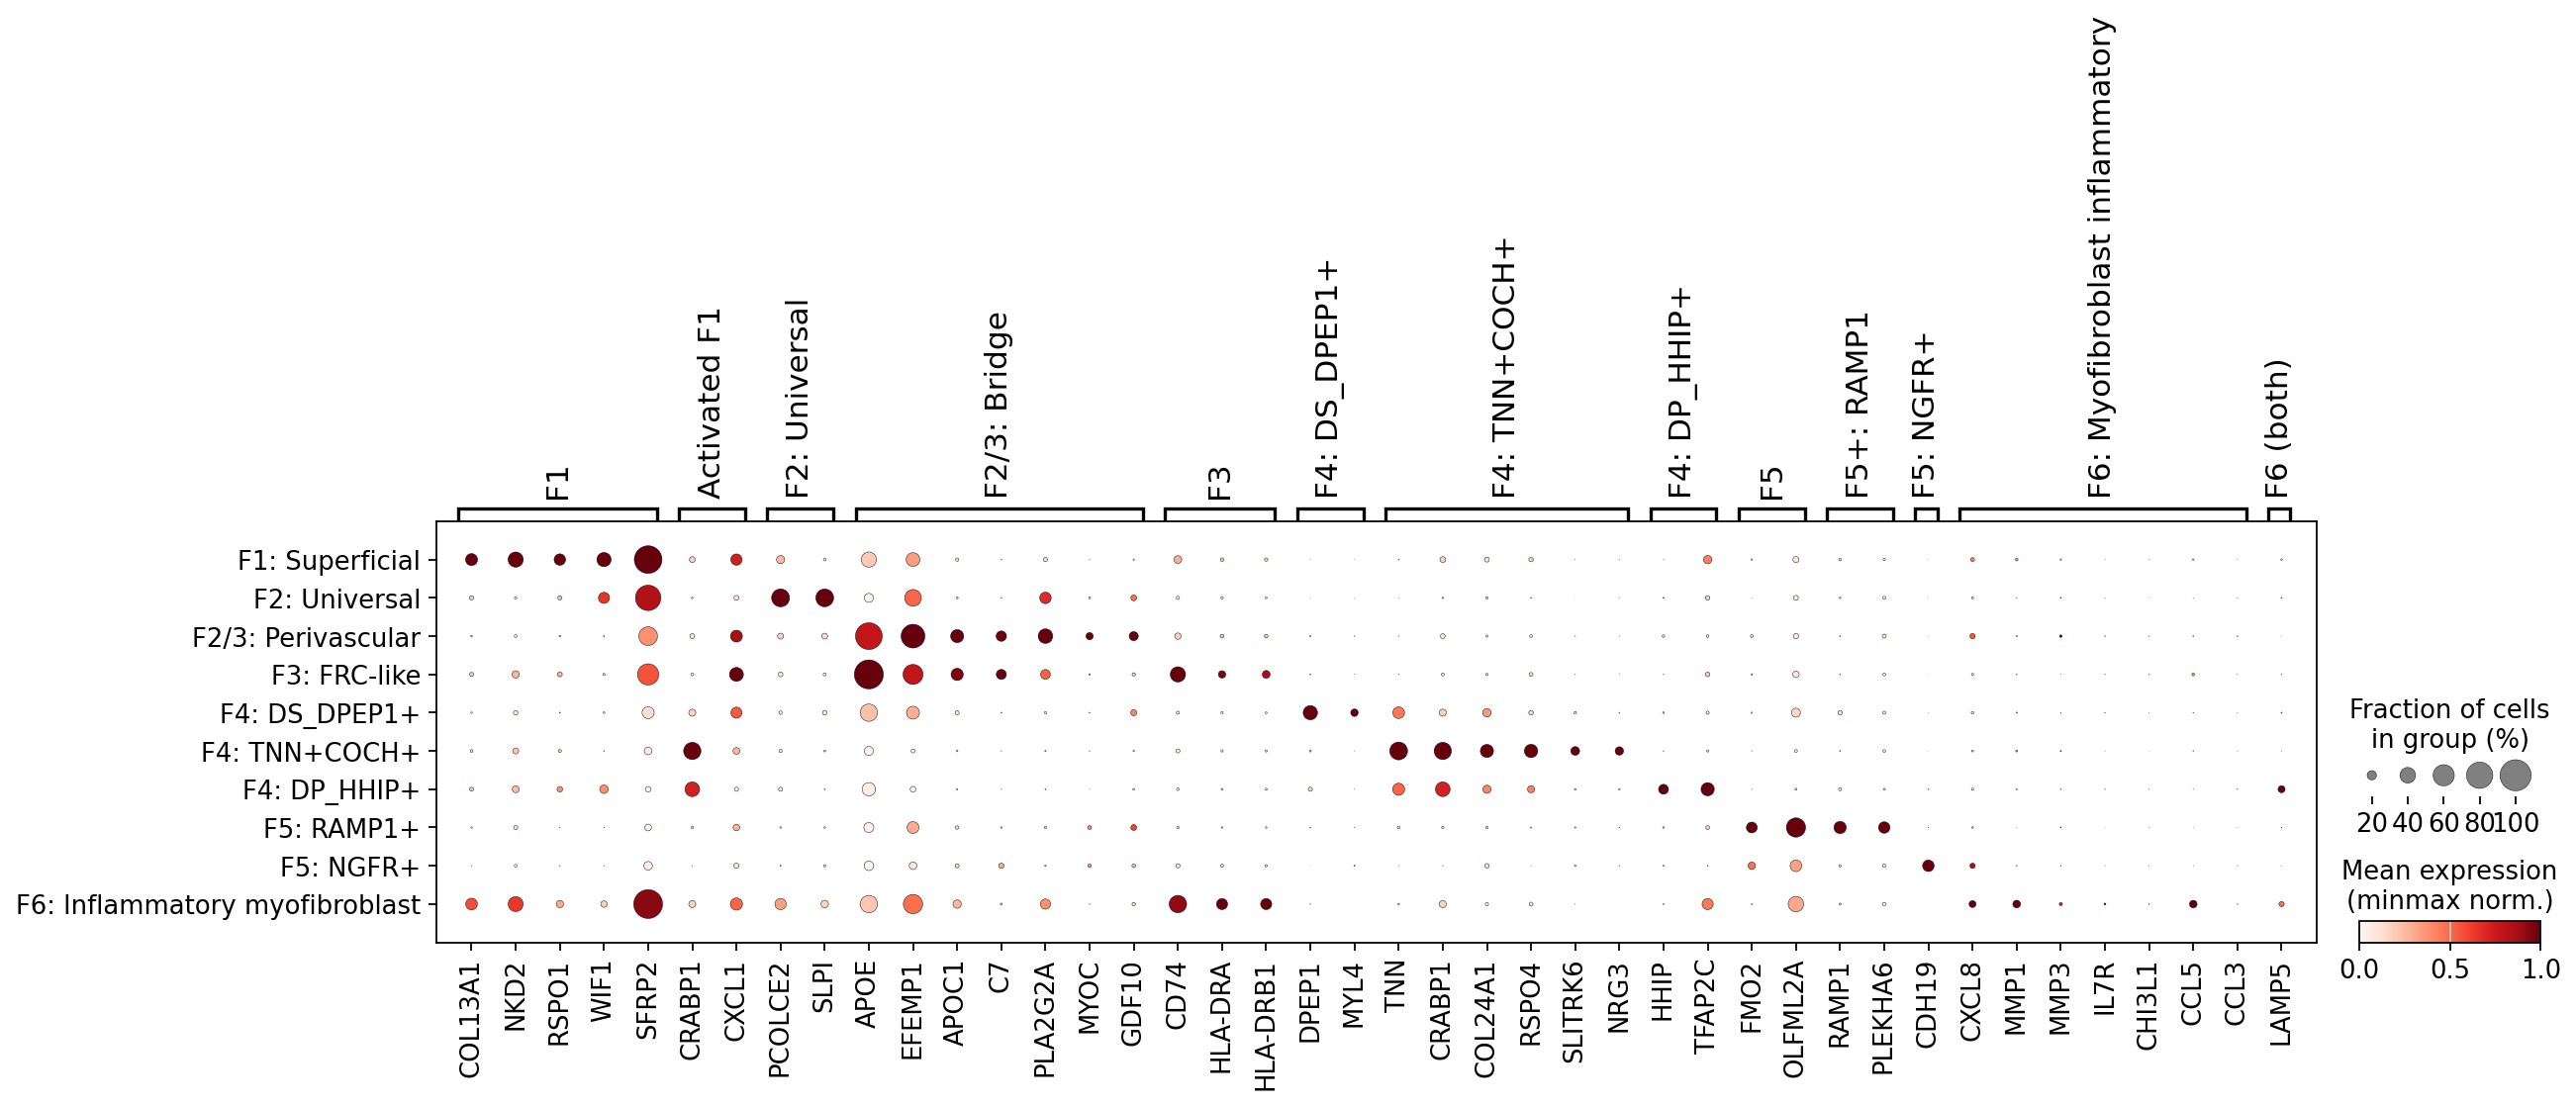

In [42]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST



#adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["scanvi_predictions"]
#adata_5k


FBS = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'COMP',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'SFRP2'],
                    "Activated F1": [ 'CRABP1',
  'TNFRSF21',
  'CXCL1'],
                   'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'CTHRC1',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1'],
          "Activated F3": ["ADAMDEC1", "CXCL9", "CXCL10"],
 'F4': ['ASPN'],
 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C', 'DPEP1', 'MYL4',  "VIPR2", "RUBCNL"],
 'F4: TNN+COCH+': ['TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  'RSPO4',
  'SLITRK6',
  'NRG3',
  'MKX',
  'TNMD',  "TRPM3", "PRKCB",],
 'F4: DP_HHIP+': ['CORIN',
  'BMP7',
  'WNT5A',
  'LEF1',
  'HHIP',
  'RSPO3',
  #'INHBA',
  'PTCH1', "ALPL", "CACNA1D", "ALPL", "TFAP2C","FGFR3", "SH2B2","LAMA3",
],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CDH19', 'CLDN1'],
'F6: Myofibroblast inflammatory': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11'],
 'F6 (both)': ["ADAM12",'WNT2', 'COL10A1', 'LAMP5'],
         
         }

dict2 = remove_markers(FBS)
SCRNA_ONLY = {
    key: [gene for gene in vals if gene not in dict2.get(key, [])]
    for key, vals in FBS.items()
}
SCRNA_ONLY = {k: v for k, v in SCRNA_ONLY.items() if v}



sc.pl.dotplot(
    adata_i,
      SCRNA_ONLY,
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(minmax norm.)', 
   standard_scale="var",
    dendrogram=False,
   save="fb_scrnaONLY.pdf"
)
 